# EDA #

# DATA IMPORTING #
In this part at first i load the dataset and i provide a little bit defenithion for them. As it is clear its a time seris analysis cause we have period of time and features. this data set consits of age, ....

but i provide explanations for some of them. for example endurance_level is a combinations of (avg_heart_rate,resting_heart_rate,duration_minutes,activity_type). sleep_def ("Sleep deviation from the recommended amount (e.g., 7 or 8 hours of standard sleep))

**preprocessing**

In [1]:
import pandas as pd

df = pd.read_csv("dataset_to_nonhyper.csv")
df

Unnamed: 0  participant_id       date  age gender  height_cm  weight_kg  \
0              0               8   1/1/2024   54      M      186.2      77.10   
1              1               8   1/3/2024   54      M      186.2      78.68   
2              2               8   1/4/2024   54      M      186.2      70.68   
3              3               8   1/9/2024   54      M      186.2      76.04   
4              4               8  1/11/2024   54      M      186.2      79.32   
...          ...             ...        ...  ...    ...        ...        ...   
3403        3403            2998  5/19/2024   24      M      170.1      64.50   
3404        3404            2998  5/20/2024   24      M      170.1      63.63   
3405        3405            2998  5/22/2024   24      M      170.1      63.61   
3406        3406            2998  5/23/2024   24      M      170.1      64.01   
3407        3407            2998  5/25/2024   24      M      170.1      58.68   

        bmi activity_type  duration_minutes  ... smoke_cur  fitness_hi  \
0     22.24          Yoga              60.4  ...         0           0   
1     22.69          Yoga              20.0  ...         0           0   
2     20.39          Yoga              29.3  ...         0           0   
3     21.93          Yoga              20.0  ...         0           0   
4     22.88          Yoga              20.0  ...         0           0   
...     ...           ...               ...  ...       ...         ...   
3403  22.29        Tennis              20.5  ...         0           0   
3404  21.99          HIIT              79.3  ...         0           0   
3405  21.98       Running              48.7  ...         0           0   
3406  22.12          HIIT              90.2  ...         0           0   
3407  20.28        Tennis              82.0  ...         0           0   

      blood_pressure_systolic  blood_pressure_diastolic  \
0                       137.9                      96.1   
1                       138.8                      96.6   
2                       137.1                      93.6   
3                       136.1                      93.5   
4                       137.7                      95.7   
...                       ...                       ...   
3403                    129.2                     111.1   
3404                    127.2                     106.9   
3405                    127.8                     109.3   
3406                    124.5                     105.0   
3407                     99.2                      84.2   

      Blood_Pressure_Status  Status_Changed  deterioration  threshold_change  \
0                   Grade 1           False          False              none   
1                   Grade 1           False          False              none   
2                   Grade 1           False          False              none   
3                   Grade 1           False          False              none   
4                   Grade 1           False          False              none   
...                     ...             ...            ...               ...   
3403                Grade 3            True           True              none   
3404                Grade 2           False          False              none   
3405                Grade 2           False          False              none   
3406                Grade 2           False          False              none   
3407                 Normal            True          False       to-nonhyper   

      to_nonhyper time_to_event  
0           False            21  
1           False            19  
2           False            18  
3           False            13  
4           False            11  
...           ...           ...  
3403        False             6  
3404        False             5  
3405        False             3  
3406        False             2  
3407         True             0  

[3408 rows x 40 columns]

In [2]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)


change them to date from srting

In [3]:
df['date'] = pd.to_datetime(df['date'])


In [4]:
# Sort by participant and date
df = df.sort_values(by=['participant_id', 'date'])
df

participant_id       date  age gender  height_cm  weight_kg    bmi  \
0                  8 2024-01-01   54      M      186.2      77.10  22.24   
1                  8 2024-01-03   54      M      186.2      78.68  22.69   
2                  8 2024-01-04   54      M      186.2      70.68  20.39   
3                  8 2024-01-09   54      M      186.2      76.04  21.93   
4                  8 2024-01-11   54      M      186.2      79.32  22.88   
...              ...        ...  ...    ...        ...        ...    ...   
3403            2998 2024-05-19   24      M      170.1      64.50  22.29   
3404            2998 2024-05-20   24      M      170.1      63.63  21.99   
3405            2998 2024-05-22   24      M      170.1      63.61  21.98   
3406            2998 2024-05-23   24      M      170.1      64.01  22.12   
3407            2998 2024-05-25   24      M      170.1      58.68  20.28   

     activity_type  duration_minutes intensity  ...  smoke_cur  fitness_hi  \
0             Yoga              60.4    Medium  ...          0           0   
1             Yoga              20.0    Medium  ...          0           0   
2             Yoga              29.3    Medium  ...          0           0   
3             Yoga              20.0       Low  ...          0           0   
4             Yoga              20.0    Medium  ...          0           0   
...            ...               ...       ...  ...        ...         ...   
3403        Tennis              20.5      High  ...          0           0   
3404          HIIT              79.3       Low  ...          0           0   
3405       Running              48.7    Medium  ...          0           0   
3406          HIIT              90.2      High  ...          0           0   
3407        Tennis              82.0    Medium  ...          0           0   

      blood_pressure_systolic  blood_pressure_diastolic  \
0                       137.9                      96.1   
1                       138.8                      96.6   
2                       137.1                      93.6   
3                       136.1                      93.5   
4                       137.7                      95.7   
...                       ...                       ...   
3403                    129.2                     111.1   
3404                    127.2                     106.9   
3405                    127.8                     109.3   
3406                    124.5                     105.0   
3407                     99.2                      84.2   

      Blood_Pressure_Status  Status_Changed  deterioration  threshold_change  \
0                   Grade 1           False          False              none   
1                   Grade 1           False          False              none   
2                   Grade 1           False          False              none   
3                   Grade 1           False          False              none   
4                   Grade 1           False          False              none   
...                     ...             ...            ...               ...   
3403                Grade 3            True           True              none   
3404                Grade 2           False          False              none   
3405                Grade 2           False          False              none   
3406                Grade 2           False          False              none   
3407                 Normal            True          False       to-nonhyper   

     to_nonhyper time_to_event  
0          False            21  
1          False            19  
2          False            18  
3          False            13  
4          False            11  
...          ...           ...  
3403       False             6  
3404       False             5  
3405       False             3  
3406       False             2  
3407        True             0  

[3408 rows x 39 columns]

In [5]:
# check for resonal variable
print(df[['blood_pressure_systolic', 'blood_pressure_diastolic']].describe())


       blood_pressure_systolic  blood_pressure_diastolic
count              3408.000000               3408.000000
mean                137.019219                 97.375646
std                  13.526229                  9.235792
min                  90.000000                 50.000000
25%                 127.900000                 92.500000
50%                 137.100000                 98.300000
75%                 145.200000                103.400000
max                 196.300000                130.000000


In [6]:
original_shape = df.shape

In [7]:
#check for missing value
df = df.dropna(subset=['time_to_event', 'blood_pressure_systolic', 'blood_pressure_diastolic'])


In [8]:
print("Original shape:", original_shape)
print("New shape after dropna:", df.shape)

Original shape: (3408, 39)
New shape after dropna: (3408, 39)


check the unique items

In [9]:
print("Unique participants:", df['participant_id'].nunique())


Unique participants: 177


this code is for smoothimg. it means reduce the  noise in order to see the trend well. with the help of MA we can see the trend specially in systolic.  

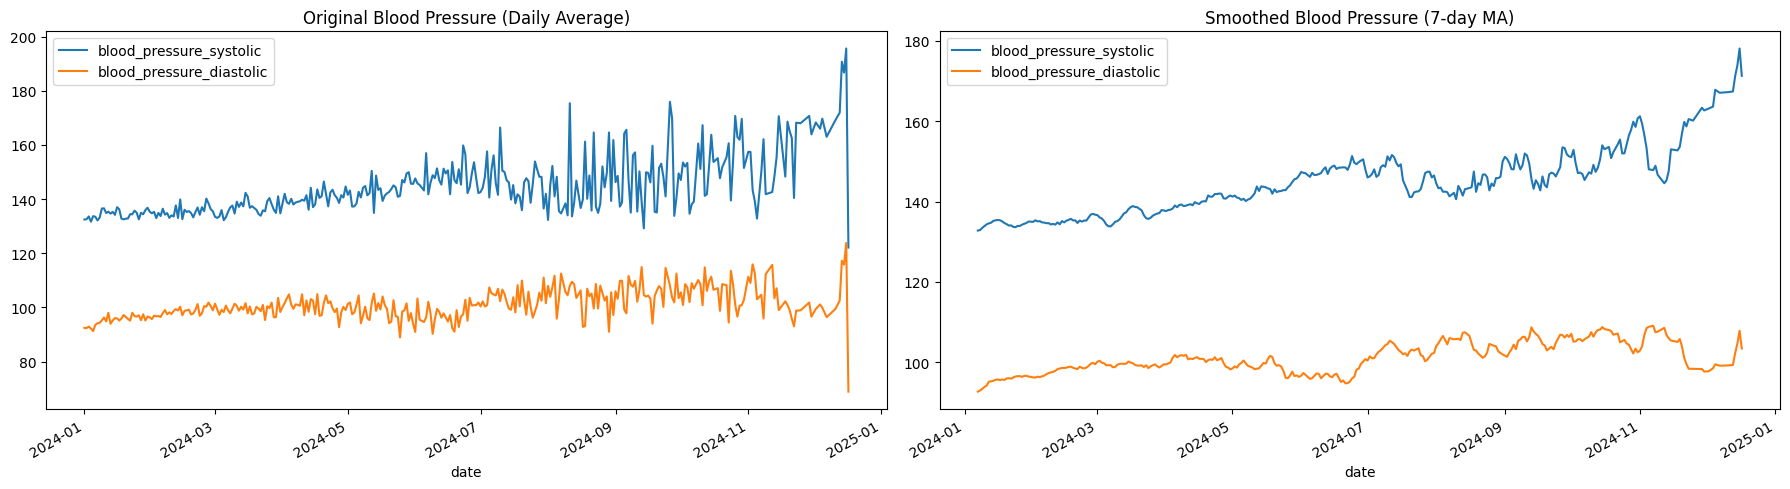

In [10]:
# 1. ŸÖ€åÿßŸÜ⁄Ø€åŸÜ‚Äå⁄Ø€åÿ±€å ÿ±Ÿàÿ≤ÿßŸÜŸá ŸÅÿ¥ÿßÿ± ÿ≥€åÿ≥ÿ™ŸàŸÑ€å⁄© Ÿà ÿØ€åÿßÿ≥ÿ™ŸàŸÑ€å⁄©
sd_df = df.groupby('date')[['blood_pressure_systolic', 'blood_pressure_diastolic']].mean()

# 2. ŸáŸÖŸàÿßÿ±ÿ≥ÿßÿ≤€å ÿ®ÿß ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ŸÖÿ™ÿ≠ÿ±⁄© €∑ ÿ±Ÿàÿ≤Ÿá
sd_df_smooth = sd_df.rolling(window=7).mean()

# 3. ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ÿßÿµŸÑ€å Ÿà ŸÜŸÖŸàÿØÿßÿ± ŸáŸÖŸàÿßÿ±ÿ¥ÿØŸá ÿØÿ± ⁄©ŸÜÿßÿ± ŸáŸÖ
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sd_df.plot(ax=axes[0], title='Original Blood Pressure (Daily Average)')
sd_df_smooth.plot(ax=axes[1], title='Smoothed Blood Pressure (7-day MA)')

plt.tight_layout()
plt.show()


providing times series for any paricipant , cause we wamt to predict blood presure for any person.

In [11]:
grouped = df.groupby('participant_id')
participant_series = {
    pid: group.set_index('date')['time_to_event'].sort_index()
    for pid, group in grouped
    if len(group) >= 12
}


In [12]:
print("Participants with ‚â• 10 visits:", len(participant_series))


Participants with ‚â• 10 visits: 62


printing just one of them for checking.

In [13]:
sample_pid = list(participant_series.keys())[0]
sample_series = participant_series[sample_pid]
print(f"\nSample time series for participant {sample_pid}:\n")
print(sample_series.head())



Sample time series for participant 30:

date
2024-01-02    41
2024-01-03    40
2024-01-06    37
2024-01-07    36
2024-01-08    35
Name: time_to_event, dtype: int64


plot to see the trend at least for 4 particiapnt.

the first plot show me when one person get ride of hypertension.

(array([19723., 19737., 19754., 19768., 19783., 19797., 19814., 19828.]),
 [Text(19723.0, 0, '2024-01-01'),
  Text(19737.0, 0, '2024-01-15'),
  Text(19754.0, 0, '2024-02-01'),
  Text(19768.0, 0, '2024-02-15'),
  Text(19783.0, 0, '2024-03-01'),
  Text(19797.0, 0, '2024-03-15'),
  Text(19814.0, 0, '2024-04-01'),
  Text(19828.0, 0, '2024-04-15')])

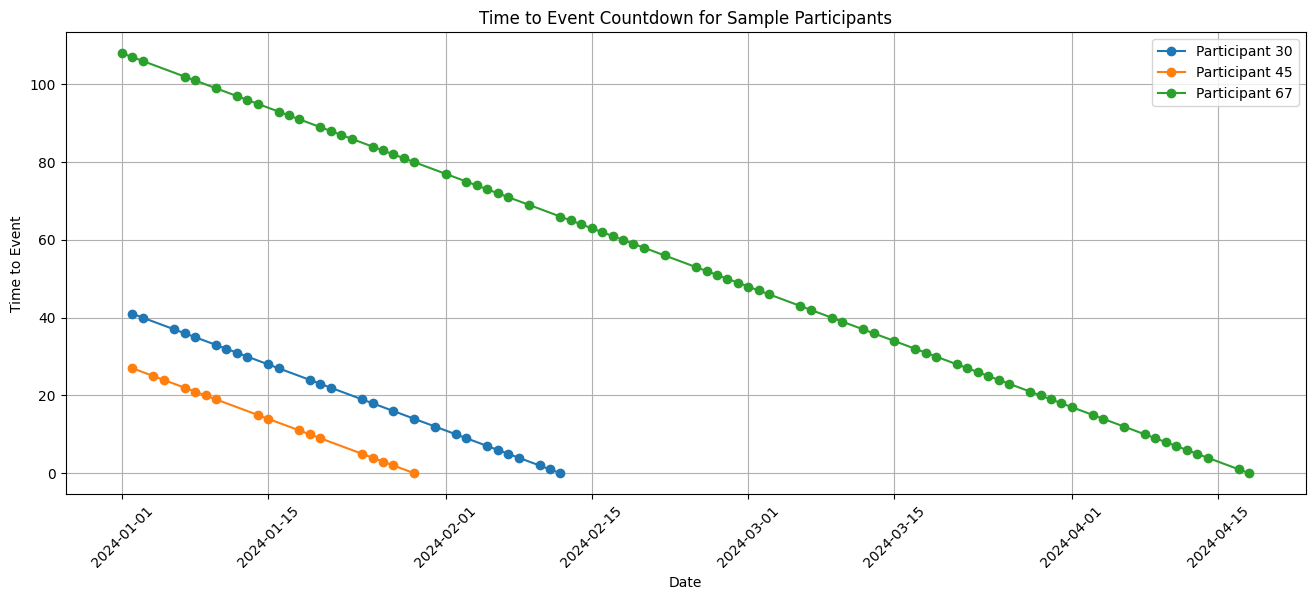

In [14]:
import matplotlib.pyplot as plt

sample_ids = list(participant_series.keys())[:3]

plt.figure(figsize=(16, 6))  # ŸÅÿ∂ÿß€å ÿßŸÅŸÇ€å ÿ®€åÿ¥ÿ™ÿ± ÿ®ÿ±ÿß€å ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß

for pid in sample_ids:
    series = participant_series[pid]
    plt.plot(series.index, series.values, marker='o', label=f'Participant {pid}')

plt.title("Time to Event Countdown for Sample Participants")
plt.xlabel("Date")
plt.ylabel("Time to Event")

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)



In [15]:
# ÿØ€å⁄©ÿ¥ŸÜÿ±€å ÿ®ÿ±ÿß€å ŸÜ⁄ØŸáÿØÿßÿ±€å ÿ™ÿßÿ±€åÿÆ ÿ±Ÿà€åÿØÿßÿØ Ÿáÿ± ŸÅÿ±ÿØ
event_dates = {}

for pid, series in participant_series.items():
    zero_event = series[series == 0]
    if not zero_event.empty:
        event_dates[pid] = zero_event.index[0]  # ÿßŸàŸÑ€åŸÜ ÿ™ÿßÿ±€åÿÆ ⁄©Ÿá time_to_event = 0 ÿ¥ÿØŸá


In [16]:
bp_by_person = {}

for pid, event_date in event_dates.items():
    sub_df = df[df['participant_id'] == pid].copy()
    sub_df['date'] = pd.to_datetime(sub_df['date'])
    sub_df = sub_df.sort_values('date')

    # ÿßŸÜÿ™ÿÆÿßÿ® ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ ÿßÿ≤ 14 ÿ±Ÿàÿ≤ ŸÇÿ®ŸÑ ÿ™ÿß ÿ±Ÿàÿ≤ event
    bp_window = sub_df[(sub_df['date'] <= event_date) &
                       (sub_df['date'] >= event_date - pd.Timedelta(days=14))]

    bp_by_person[pid] = bp_window[['date', 'blood_pressure_systolic', 'blood_pressure_diastolic']]


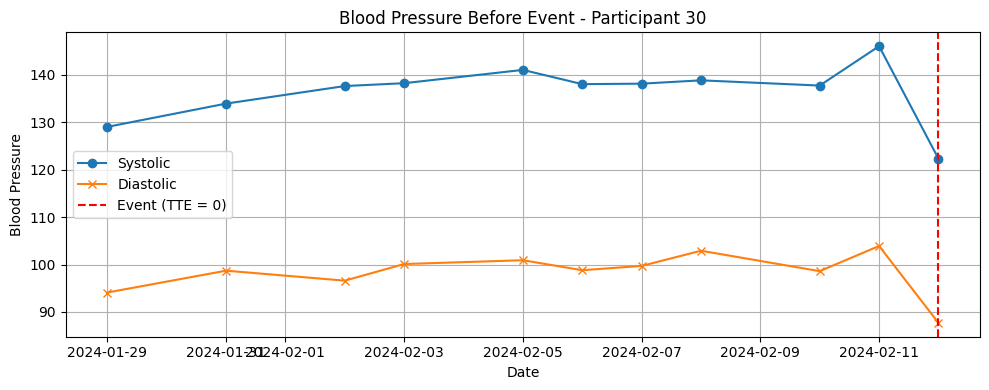

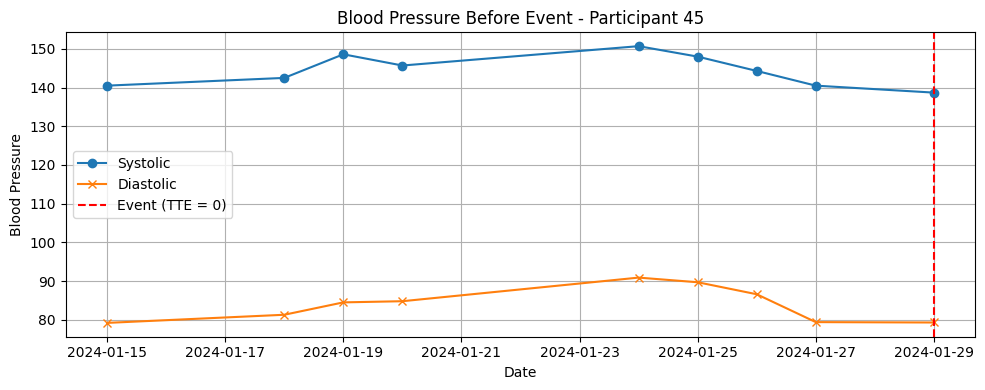

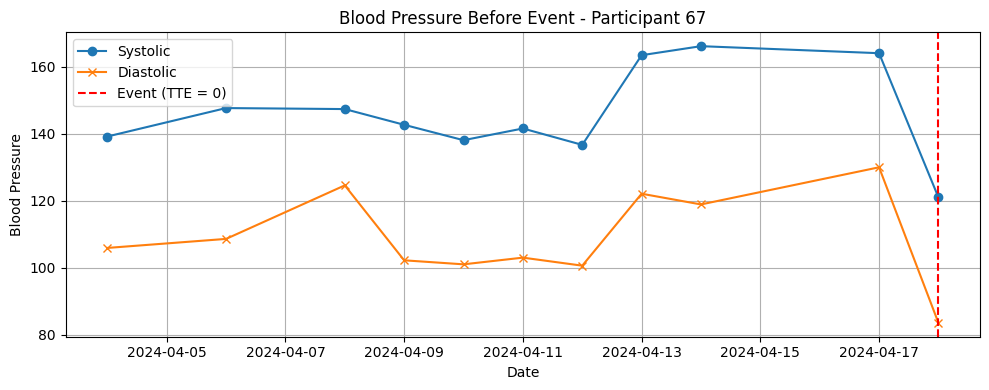

In [17]:
import matplotlib.pyplot as plt

for pid, bp_data in list(bp_by_person.items())[:3]:  # ŸÅŸÇÿ∑ ÿ®ÿ±ÿß€å 3 ŸÜŸÅÿ± ÿßŸàŸÑ
    plt.figure(figsize=(10, 4))
    plt.plot(bp_data['date'], bp_data['blood_pressure_systolic'], label='Systolic', marker='o')
    plt.plot(bp_data['date'], bp_data['blood_pressure_diastolic'], label='Diastolic', marker='x')

    plt.axvline(event_dates[pid], color='red', linestyle='--', label='Event (TTE = 0)')
    plt.title(f'Blood Pressure Before Event - Participant {pid}')
    plt.xlabel('Date')
    plt.ylabel('Blood Pressure')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#Time Series Preprocessing & Preparation#

creat time seris for any person and go for deep analysis and also smoothing for any person

In [18]:
# for example choose the first one and give its data from the main dataset and provide the date as a index for time series analysis.
sample_pid = sample_ids[0]
participant_data = df[df['participant_id'] == sample_pid].copy()
participant_data = participant_data.sort_values(by='date')
participant_data.set_index('date', inplace=True)

like prevoius i want to remove the noisy data for see the table better , but just for one special person wth the help of MA for seeing the trend in every feature.

In [19]:
# Rolling averages
# 7-day rolling averages for deeper trend smoothing
participant_data['rolling_mean_7_systolic'] = participant_data['blood_pressure_systolic'].rolling(window=7).mean()
participant_data['rolling_mean_7_diastolic'] = participant_data['blood_pressure_diastolic'].rolling(window=7).mean()

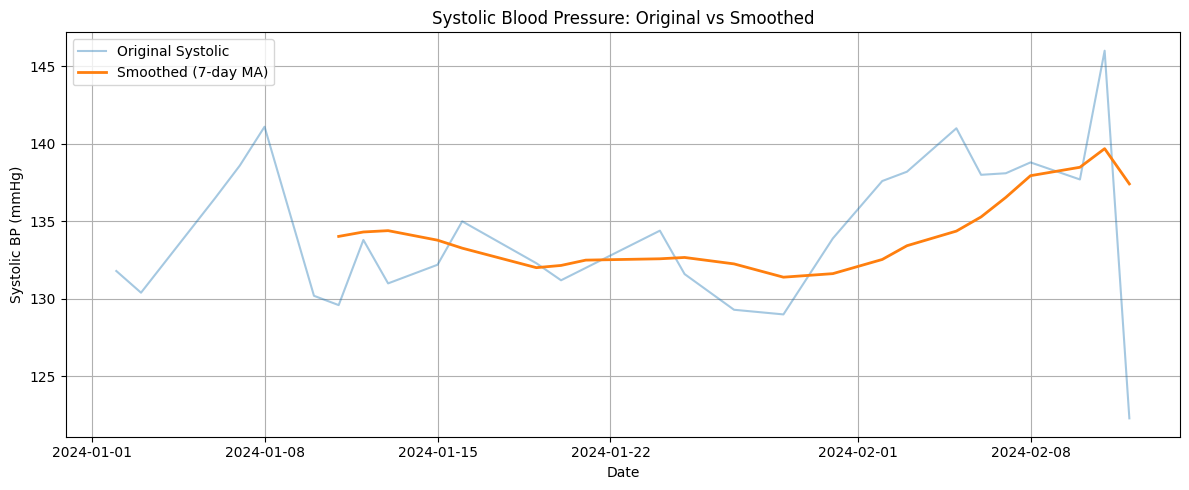

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# ŸÜŸÖŸàÿØÿßÿ± ÿßÿµŸÑ€å ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ ÿ≥€åÿ≥ÿ™ŸàŸÑ€å⁄©
plt.plot(participant_data.index, participant_data['blood_pressure_systolic'], label='Original Systolic', alpha=0.4)

# ŸÜŸÖŸàÿØÿßÿ± ŸáŸÖŸàÿßÿ±ÿ¥ÿØŸá ÿ®ÿß ŸÖ€åÿßŸÜ⁄Ø€åŸÜ €∑ ÿ±Ÿàÿ≤Ÿá
plt.plot(participant_data.index, participant_data['rolling_mean_7_systolic'], label='Smoothed (7-day MA)', linewidth=2)

plt.title('Systolic Blood Pressure: Original vs Smoothed')
plt.xlabel('Date')
plt.ylabel('Systolic BP (mmHg)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


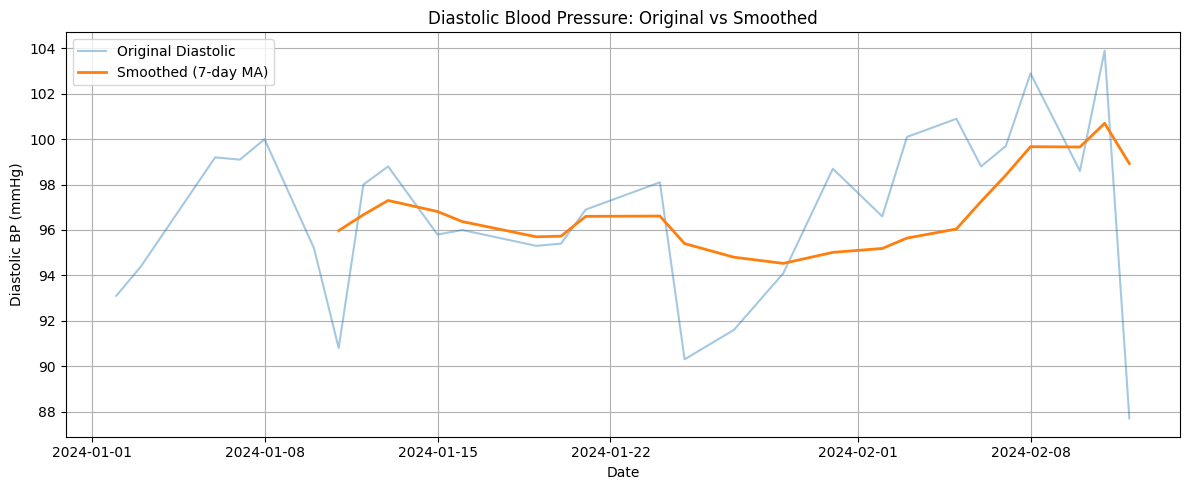

In [21]:

plt.figure(figsize=(12, 5))

# ŸÜŸÖŸàÿØÿßÿ± ÿßÿµŸÑ€å ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ ÿØ€åÿßÿ≥ÿ™ŸàŸÑ€å⁄©
plt.plot(participant_data.index, participant_data['blood_pressure_diastolic'], label='Original Diastolic', alpha=0.4)

# ŸÜŸÖŸàÿØÿßÿ± ŸáŸÖŸàÿßÿ±ÿ¥ÿØŸá ÿ®ÿß ŸÖ€åÿßŸÜ⁄Ø€åŸÜ €∑ ÿ±Ÿàÿ≤Ÿá
plt.plot(participant_data.index, participant_data['rolling_mean_7_diastolic'], label='Smoothed (7-day MA)', linewidth=2)

plt.title('Diastolic Blood Pressure: Original vs Smoothed')
plt.xlabel('Date')
plt.ylabel('Diastolic BP (mmHg)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
sample_pid = sample_ids[0]
participant_data = df[df['participant_id'] == sample_pid].copy()
participant_data = participant_data.sort_values(by='date')
participant_data.set_index('date', inplace=True)

In [23]:
# Rolling averages
# 7-day rolling averages for deeper trend smoothing
participant_data['rolling_mean_7_systolic'] = participant_data['blood_pressure_systolic'].rolling(window=7).mean()
participant_data['rolling_mean_7_diastolic'] = participant_data['blood_pressure_diastolic'].rolling(window=7).mean()

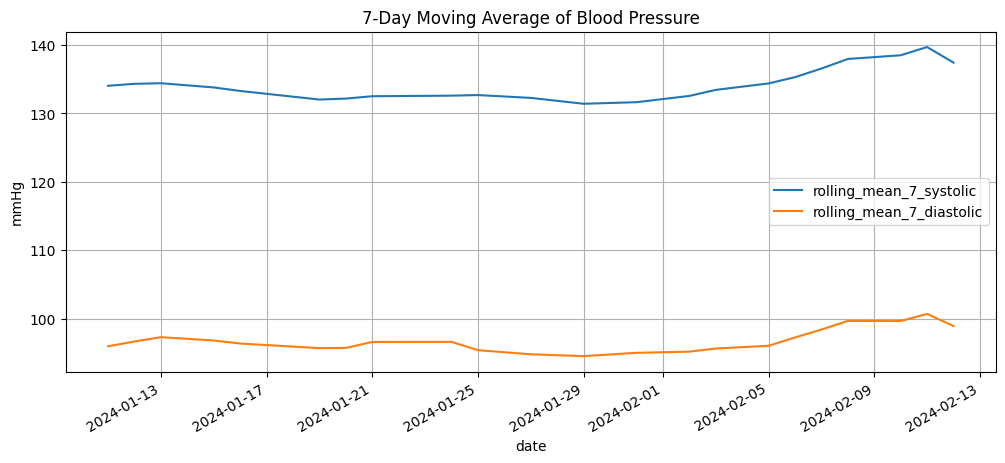

In [24]:
# Applying a 7-day moving average to align noise and indicate the real trends
# Use the columns with the rolling averages from participant_data
participant_data[['rolling_mean_7_systolic', 'rolling_mean_7_diastolic']].plot(figsize=(12, 5), title='7-Day Moving Average of Blood Pressure')
plt.ylabel('mmHg')
plt.grid(True)
plt.show()

Anomaly detection for this specifis person before go further for checking the stationary and checking the deterministic or stochastic trend for this spesific person.

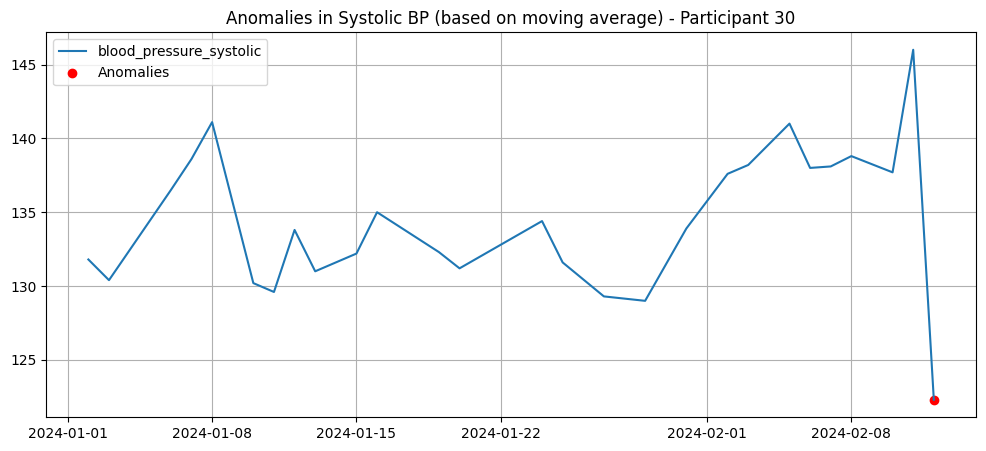

In [25]:
# Use the columns with the rolling averages from participant_data which we used in for moving average
# Store the rolling average data in a variable
rolling = participant_data['rolling_mean_7_systolic']
# Now calculate residuals using participant_data and the rolling average
# Note: This calculates residuals for a single participant (sample_pid)
residuals = participant_data['blood_pressure_systolic'] - rolling
threshold = 1.5 * residuals.std()
anomalies = residuals[abs(residuals) > threshold]
plt.figure(figsize=(12, 5))
# Plot the original systolic BP for the participant
plt.plot(participant_data.index, participant_data['blood_pressure_systolic'], label='blood_pressure_systolic')
# Scatter plot anomalies
plt.scatter(anomalies.index, participant_data.loc[anomalies.index]['blood_pressure_systolic'], color='red', label='Anomalies')
plt.title(f'Anomalies in Systolic BP (based on moving average) - Participant {sample_pid}')
plt.legend()
plt.grid(True)
plt.show()

These are anomalies ‚Äî sudden changes that don‚Äôt follow the general trend. They might be caused by stress, errors, or critical health events.

checking stationary for a specific person. 1)blood_pressure_systolic *2*)blood_pressure_diastolic 3) time to event

In [26]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# ŸÅÿ±ÿ∂: participant_id Ÿáÿß€å ÿ≤€åÿßÿØ€å ÿØÿßÿ±€å Ÿà ŸÖ€å‚ÄåÿÆŸàÿß€å ÿßŸàŸÑ€å ÿ±Ÿà ÿ®ÿ±ÿ±ÿ≥€å ⁄©ŸÜ€å
sample_pid = df['participant_id'].unique()[0]

# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ÿ¢ŸÜ ÿ¥ÿ±⁄©ÿ™‚Äå⁄©ŸÜŸÜÿØŸá
participant_data = df[df['participant_id'] == sample_pid].sort_values('date')
participant_data = participant_data.set_index('date')

# ÿßŸÜÿ™ÿÆÿßÿ® ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å ŸÖŸàÿ±ÿØ ÿ®ÿ±ÿ±ÿ≥€å: time_to_event
ts = participant_data['blood_pressure_systolic']

# ÿßÿ¨ÿ±ÿß€å ÿ¢ÿ≤ŸÖŸàŸÜ ÿØ€å⁄©€å ŸÅŸàŸÑÿ±
adf_result = adfuller(ts.dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")

# ÿ™ŸÅÿ≥€åÿ± ŸÜÿ™€åÿ¨Ÿá
if adf_result[1] < 0.05:
    print("\n‚úÖ Series is stationary (reject H0)")
else:
    print("\n‚ùå Series is non-stationary (fail to reject H0)")

ADF Statistic: -3.9416730041914767
p-value: 0.001748686847498128
Critical Value (1%): -4.6651863281249994
Critical Value (5%): -3.3671868750000002
Critical Value (10%): -2.802960625

‚úÖ Series is stationary (reject H0)


<Figure size 1000x500 with 0 Axes>

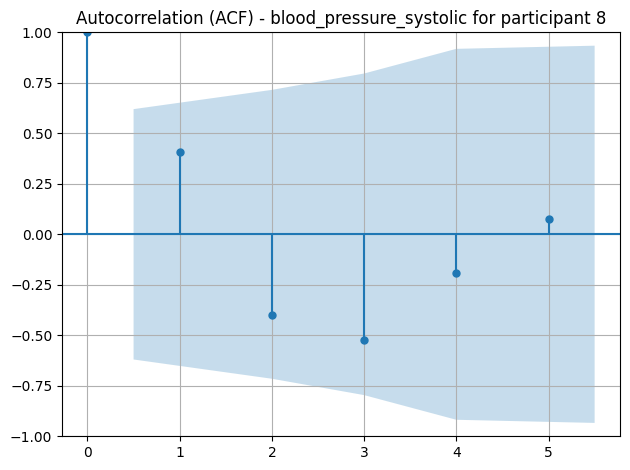

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å time_to_event
ts = participant_data['blood_pressure_systolic']

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ACF
plt.figure(figsize=(10, 5))
plot_acf(ts.dropna(), lags=5)  # ÿ®ÿ±ÿ±ÿ≥€å ÿ™ÿß 30 lag
plt.title(f"Autocorrelation (ACF) - blood_pressure_systolic for participant {sample_pid}")
plt.grid(True)
plt.tight_layout()
plt.show()


with the help of this visualization , i can understand which the variable is stationar or not. because if its decrease instantly, it would be a stationary but if its constantly decreade smoothely, it means its not stationary .

In [28]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# ŸÅÿ±ÿ∂: participant_id Ÿáÿß€å ÿ≤€åÿßÿØ€å ÿØÿßÿ±€å Ÿà ŸÖ€å‚ÄåÿÆŸàÿß€å ÿßŸàŸÑ€å ÿ±Ÿà ÿ®ÿ±ÿ±ÿ≥€å ⁄©ŸÜ€å
sample_pid = df['participant_id'].unique()[0]

# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ÿ¢ŸÜ ÿ¥ÿ±⁄©ÿ™‚Äå⁄©ŸÜŸÜÿØŸá
participant_data = df[df['participant_id'] == sample_pid].sort_values('date')
participant_data = participant_data.set_index('date')

# ÿßŸÜÿ™ÿÆÿßÿ® ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å ŸÖŸàÿ±ÿØ ÿ®ÿ±ÿ±ÿ≥€å: time_to_event
ts = participant_data['blood_pressure_diastolic']

# ÿßÿ¨ÿ±ÿß€å ÿ¢ÿ≤ŸÖŸàŸÜ ÿØ€å⁄©€å ŸÅŸàŸÑÿ±
adf_result = adfuller(ts.dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")

# ÿ™ŸÅÿ≥€åÿ± ŸÜÿ™€åÿ¨Ÿá
if adf_result[1] < 0.05:
    print("\n‚úÖ Series is stationary (reject H0)")
else:
    print("\n‚ùå Series is non-stationary (fail to reject H0)")

ADF Statistic: -8.598073104306305
p-value: 6.989150804274605e-14
Critical Value (1%): -5.354256481481482
Critical Value (5%): -3.6462381481481483
Critical Value (10%): -2.901197777777778

‚úÖ Series is stationary (reject H0)


<Figure size 1000x500 with 0 Axes>

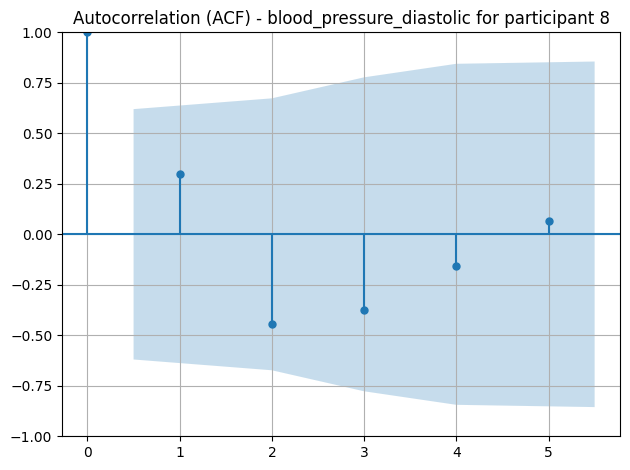

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å time_to_event
ts = participant_data['blood_pressure_diastolic']

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ACF
plt.figure(figsize=(10, 5))
plot_acf(ts.dropna(), lags=5)  # ÿ®ÿ±ÿ±ÿ≥€å ÿ™ÿß 30 lag
plt.title(f"Autocorrelation (ACF) - blood_pressure_diastolic for participant {sample_pid}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# ŸÅÿ±ÿ∂: participant_id Ÿáÿß€å ÿ≤€åÿßÿØ€å ÿØÿßÿ±€å Ÿà ŸÖ€å‚ÄåÿÆŸàÿß€å ÿßŸàŸÑ€å ÿ±Ÿà ÿ®ÿ±ÿ±ÿ≥€å ⁄©ŸÜ€å
sample_pid = df['participant_id'].unique()[0]

# ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿØÿßÿØŸá‚ÄåŸáÿß€å ŸÖÿ±ÿ®Ÿàÿ∑ ÿ®Ÿá ÿ¢ŸÜ ÿ¥ÿ±⁄©ÿ™‚Äå⁄©ŸÜŸÜÿØŸá
participant_data = df[df['participant_id'] == sample_pid].sort_values('date')
participant_data = participant_data.set_index('date')

# ÿßŸÜÿ™ÿÆÿßÿ® ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å ŸÖŸàÿ±ÿØ ÿ®ÿ±ÿ±ÿ≥€å: time_to_event
ts = participant_data['time_to_event']

# ÿßÿ¨ÿ±ÿß€å ÿ¢ÿ≤ŸÖŸàŸÜ ÿØ€å⁄©€å ŸÅŸàŸÑÿ±
adf_result = adfuller(ts.dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")

# ÿ™ŸÅÿ≥€åÿ± ŸÜÿ™€åÿ¨Ÿá
if adf_result[1] < 0.05:
    print("\n‚úÖ Series is stationary (reject H0)")
else:
    print("\n‚ùå Series is non-stationary (fail to reject H0)")

ADF Statistic: -1.154700538379239
p-value: 0.6927727693125276
Critical Value (1%): -5.354256481481482
Critical Value (5%): -3.6462381481481483
Critical Value (10%): -2.901197777777778

‚ùå Series is non-stationary (fail to reject H0)


<Figure size 1000x500 with 0 Axes>

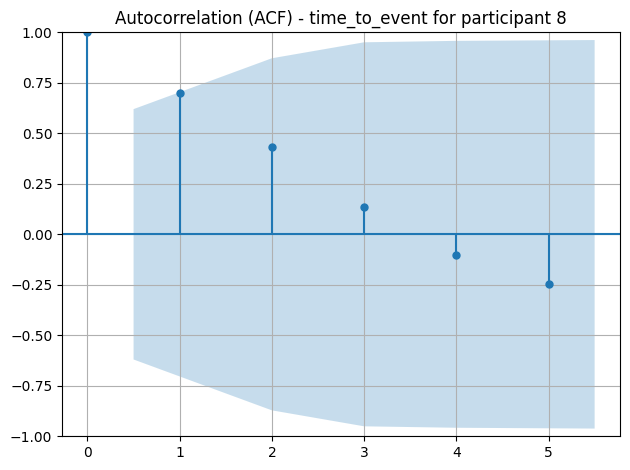

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å time_to_event
ts = participant_data['time_to_event']

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ACF
plt.figure(figsize=(10, 5))
plot_acf(ts.dropna(), lags=5)  # ÿ®ÿ±ÿ±ÿ≥€å ÿ™ÿß 30 lag
plt.title(f"Autocorrelation (ACF) - time_to_event for participant {sample_pid}")
plt.grid(True)
plt.tight_layout()
plt.show()

also i need to see why its not satationary.

choosing the univaraite model or multivariate model. with the help of Johansen test, i can understan is there any long run relathonship between time to event and blood presures or not. but unfortunately, this model can be used only if only all of varibale are I(1). in this case although i can not use that but maybe it worth to import blood presures as a explanatory variable to model. we will see. also for the sake of colliniarity i used PCA and then tried with it. so in overall, i provide in overall 11 type model.

In [32]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# ŸÅÿ±ÿ∂: df ÿ¥ÿßŸÖŸÑ ÿ≥ÿ™ŸàŸÜ‚ÄåŸáÿß€å ['time_to_event', 'systolic', 'diastolic']

# ÿß€åÿ≥ÿ™ÿßÿ≥ÿßÿ≤€å time_to_event
df['diff_time_to_event'] = df['time_to_event'].diff()
df.dropna(inplace=True)

# ÿ™ÿ≥ÿ™ ⁄Øÿ±ŸÜÿ¨ÿ± ÿ®€åŸÜ systolic ‚Üí time_to_event
print("Granger test: systolic ‚Üí time_to_event")
grangercausalitytests(df[['diff_time_to_event', 'blood_pressure_systolic']], maxlag=5)

# ÿ™ÿ≥ÿ™ ⁄Øÿ±ŸÜÿ¨ÿ± ÿ®€åŸÜ diastolic ‚Üí time_to_event
print("Granger test: diastolic ‚Üí time_to_event")
grangercausalitytests(df[['diff_time_to_event', 'blood_pressure_diastolic']], maxlag=5)


Granger test: systolic ‚Üí time_to_event

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=40.7336 , p=0.0000  , df_denom=3403, df_num=1
ssr based chi2 test:   chi2=40.7695 , p=0.0000  , df=1
likelihood ratio test: chi2=40.5274 , p=0.0000  , df=1
parameter F test:         F=40.7336 , p=0.0000  , df_denom=3403, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=59.1025 , p=0.0000  , df_denom=3400, df_num=2
ssr based chi2 test:   chi2=118.3789, p=0.0000  , df=2
likelihood ratio test: chi2=116.3676, p=0.0000  , df=2
parameter F test:         F=59.1025 , p=0.0000  , df_denom=3400, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=40.3269 , p=0.0000  , df_denom=3397, df_num=3
ssr based chi2 test:   chi2=121.2301, p=0.0000  , df=3
likelihood ratio test: chi2=119.1212, p=0.0000  , df=3
parameter F test:         F=40.3269 , p=0.0000  , df_denom=3397, df_num=3

Granger Causality
number of lags (no zero) 4
s

{np.int64(1): ({'ssr_ftest': (np.float64(100.52037126641567),
    np.float64(2.4622736182416403e-23),
    np.float64(3403.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(100.60898752083803),
    np.float64(1.1205811351782802e-23),
    np.int64(1)),
   'lrtest': (np.float64(99.15168398325477),
    np.float64(2.3388405092999498e-23),
    np.int64(1)),
   'params_ftest': (np.float64(100.52037126641223),
    np.float64(2.4622736182455418e-23),
    np.float64(3403.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(88.03613440873362),
    np.float64(5.290190348415625e-38),
    np.float64(3400.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(176.33119862455175),
    np.float64(5.130583084871044e-39),
    np.int64(2)),
   'lrtest': (np.float64(171.9172067861582),
    np.float64(4.662865347879791e-38),
    np.int64(2)),
   'params_ftest': (np.float64(88.03613440873346),
    np.float64(5.290190348416753e-38),
    np.float64(3400.0),
    2.0)},
   array([

importing the blood pressure can be useful for predict. but we have to check all.

ARIMAX

<Figure size 1000x400 with 0 Axes>

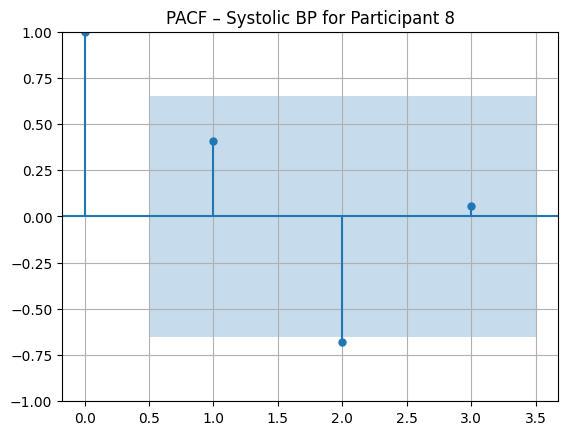

<Figure size 1000x400 with 0 Axes>

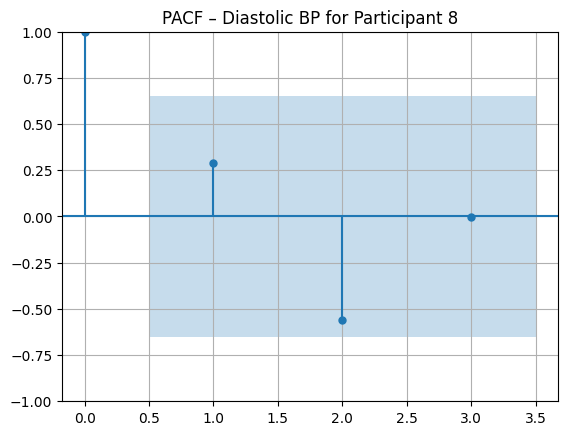

In [36]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# ÿßŸÜÿ™ÿÆÿßÿ® €å⁄© participant (ŸÖÿ´ŸÑÿßŸã ÿßŸàŸÑ€åŸÜ ŸÜŸÅÿ± ÿØÿ± ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ)
sample_pid = df['participant_id'].unique()[0]

# ŸÅ€åŸÑÿ™ÿ± ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿ±ÿß€å ÿ¢ŸÜ ŸÅÿ±ÿØ ÿÆÿßÿµ
participant_data = df[df['participant_id'] == sample_pid].sort_values('date')
participant_data = participant_data.set_index('date')

# ÿ≠ÿ∞ŸÅ ŸÖŸÇÿßÿØ€åÿ± ⁄ØŸÖÿ¥ÿØŸá ÿ®ÿ±ÿß€å ÿØŸÇÿ™ ÿ®€åÿ¥ÿ™ÿ±
systolic = participant_data['blood_pressure_systolic'].dropna()
diastolic = participant_data['blood_pressure_diastolic'].dropna()

# PACF ÿ®ÿ±ÿß€å ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ ÿ≥€åÿ≥ÿ™ŸàŸÑ€å⁄©
plt.figure(figsize=(10, 4))
plot_pacf(systolic, lags=3)
plt.title(f'PACF ‚Äì Systolic BP for Participant {sample_pid}')
plt.grid(True)
plt.show()

# PACF ÿ®ÿ±ÿß€å ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ ÿØ€åÿßÿ≥ÿ™ŸàŸÑ€å⁄©
plt.figure(figsize=(10, 4))
plot_pacf(diastolic, lags=3)
plt.title(f'PACF ‚Äì Diastolic BP for Participant {sample_pid}')
plt.grid(True)
plt.show()


so the lag for these variable would be 1.

also i need to provide the p and q and d for my main varibale(time to event).

<Figure size 1000x400 with 0 Axes>

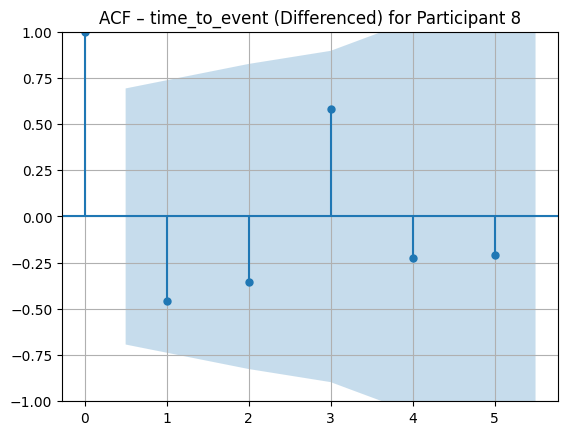

<Figure size 1000x400 with 0 Axes>

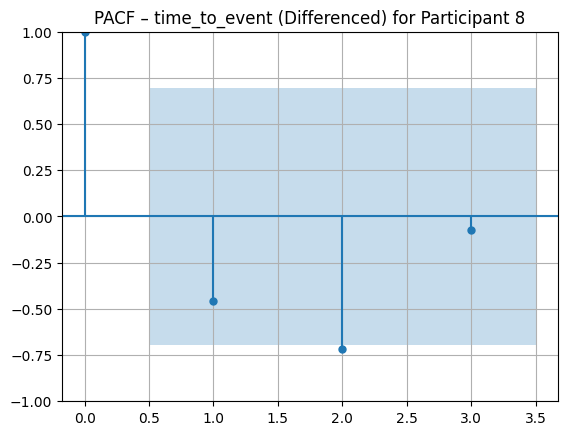

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# ÿßŸÜÿ™ÿÆÿßÿ® ŸÅÿ±ÿØ ÿÆÿßÿµ (ŸÖÿ´ŸÑÿßŸã ÿßŸàŸÑ€åŸÜ ŸÜŸÅÿ± ÿØÿ± ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ)
sample_pid = df['participant_id'].unique()[0]

# ŸÅ€åŸÑÿ™ÿ± ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿ±ÿß€å ŸáŸÖÿßŸÜ ŸÅÿ±ÿØ
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# ÿ™ŸÅÿßÿ∂ŸÑ‚Äå⁄Ø€åÿ±€å (ÿ®ÿ±ÿß€å ÿß€åÿ≥ÿ™ÿß ⁄©ÿ±ÿØŸÜ)
participant_data['diff_time_to_event'] = participant_data['time_to_event'].diff()

# ÿ≠ÿ∞ŸÅ NaNŸáÿß€å ÿ≠ÿßÿµŸÑ ÿßÿ≤ ÿ™ŸÅÿßÿ∂ŸÑ‚Äå⁄Ø€åÿ±€å
ts_diff = participant_data['diff_time_to_event'].dropna()

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± ACF ÿ®ÿ±ÿß€å ÿ™ÿπ€å€åŸÜ q
plt.figure(figsize=(10, 4))
plot_acf(ts_diff, lags=5)
plt.title(f"ACF ‚Äì time_to_event (Differenced) for Participant {sample_pid}")
plt.grid(True)
plt.show()

# ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ± PACF ÿ®ÿ±ÿß€å ÿ™ÿπ€å€åŸÜ p
plt.figure(figsize=(10, 4))
plot_pacf(ts_diff, lags=3)
plt.title(f"PACF ‚Äì time_to_event (Differenced) for Participant {sample_pid}")
plt.grid(True)
plt.show()


it would be (1,1,1) arimax model with 2 explanatory variable with the first lag.

In [38]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ÿßŸÜÿ™ÿÆÿßÿ® €å⁄© ÿ¥ÿ±⁄©ÿ™‚Äå⁄©ŸÜŸÜÿØŸá ÿÆÿßÿµ
sample_pid = df['participant_id'].unique()[0]

# ŸÅ€åŸÑÿ™ÿ± ÿØÿßÿØŸá‚ÄåŸáÿß ŸÅŸÇÿ∑ ÿ®ÿ±ÿß€å ÿ¢ŸÜ ŸÅÿ±ÿØ
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# ÿß€åÿ¨ÿßÿØ lag-1 ÿ®ÿ±ÿß€å ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ
participant_data['lag_1_systolic'] = participant_data['blood_pressure_systolic'].shift(1)
participant_data['lag_1_diastolic'] = participant_data['blood_pressure_diastolic'].shift(1)

# ŸÖÿ™ÿ∫€åÿ± Ÿàÿßÿ®ÿ≥ÿ™Ÿá
y = participant_data['time_to_event'].astype(float)

# ŸÖÿ™ÿ∫€åÿ±Ÿáÿß€å ÿ™Ÿàÿ∂€åÿ≠€å ÿ¥ÿßŸÖŸÑ ŸÖŸÇÿØÿßÿ± ÿßÿµŸÑ€å Ÿà lag-1
X = participant_data[['blood_pressure_systolic', 'blood_pressure_diastolic',
                      'lag_1_systolic', 'lag_1_diastolic']]

# ÿ≠ÿ∞ŸÅ ÿ±ÿØ€åŸÅ‚ÄåŸáÿß€å€å ⁄©Ÿá NaN ÿØÿßÿ±ŸÜÿØ (ÿ®Ÿá ÿØŸÑ€åŸÑ shift)
combined = pd.concat([y, X], axis=1).dropna()
y = combined['time_to_event']
X = combined[['blood_pressure_systolic', 'blood_pressure_diastolic',
              'lag_1_systolic', 'lag_1_diastolic']]

# ÿ™ŸÇÿ≥€åŸÖ ÿØÿßÿØŸá ÿ®Ÿá train Ÿà test
split_idx = int(len(y) * 0.8)
y_train, y_test = y[:split_idx], y[split_idx:]
X_train, X_test = X[:split_idx], X[split_idx:]

# ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ ARIMAX ÿ®ÿß Ÿæÿßÿ±ÿßŸÖÿ™ÿ±Ÿáÿß€å ÿØŸÑÿÆŸàÿßŸá
model = ARIMA(endog=y_train, exog=X_train, order=(1, 1, 1))
model_fit = model.fit()

# Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å
forecast = model_fit.forecast(steps=len(y_test), exog=X_test)

# ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rss = np.sum(np.square(y_test - forecast))

print("üìä ARIMAX Model Evaluation (Main + Lagged BP):")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.5f}")
print(f"RSS: {rss:.5f}")



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


üìä ARIMAX Model Evaluation (Main + Lagged BP):
MAE: 5.5877
MSE: 32.36004
RSS: 0.00000


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [39]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# ÿßŸÜÿ™ÿÆÿßÿ® participant ÿÆÿßÿµ
sample_pid = df['participant_id'].unique()[0]
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# ÿß€åÿ¨ÿßÿØ lag-1 ÿ®ÿ±ÿß€å ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ
participant_data['lag_1_systolic'] = participant_data['blood_pressure_systolic'].shift(1)
participant_data['lag_1_diastolic'] = participant_data['blood_pressure_diastolic'].shift(1)

# ŸÖÿ™ÿ∫€åÿ± ŸáÿØŸÅ
y = participant_data['time_to_event'].astype(float)

# ŸÖÿ™ÿ∫€åÿ±Ÿáÿß€å ÿ™Ÿàÿ∂€åÿ≠€å: ÿßÿµŸÑ€å Ÿà lag-1
X = participant_data[['blood_pressure_systolic', 'blood_pressure_diastolic',
                      'lag_1_systolic', 'lag_1_diastolic']]

# ÿ™ÿ±⁄©€åÿ® Ÿà ÿ≠ÿ∞ŸÅ NaNŸáÿß
combined = pd.concat([y, X], axis=1).dropna()
y = combined['time_to_event']
X = combined[['blood_pressure_systolic', 'blood_pressure_diastolic', 'lag_1_systolic', 'lag_1_diastolic']]

# ŸÖÿ≠ÿØŸàÿØŸá pÿå dÿå q
p_range = range(0, 5)
d_range = [1]
q_range = range(0, 5)

best_aic = np.inf
best_order = None
results = []

# Grid Search ÿ±Ÿà€å (p,d,q)
for p in p_range:
    for d in d_range:
        for q in q_range:
            try:
                model = ARIMA(endog=y, exog=X, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic
                results.append((p, d, q, aic))
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                continue

# ŸÜÿ™ÿß€åÿ¨
print(f"\n‚úÖ Best ARIMAX Order: {best_order} with AIC = {best_aic:.2f}")
result_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'AIC']).sort_values('AIC')
display(result_df)



‚úÖ Best ARIMAX Order: (3, 1, 1) with AIC = 7.20


p  d  q        AIC
16  3  1  1   7.198643
15  3  1  0  13.424467
17  3  1  2  16.326727
20  4  1  0  17.300962
18  3  1  3  18.018523
24  4  1  4  19.323501
19  3  1  4  21.670147
23  4  1  3  24.000000
22  4  1  2  25.060491
12  2  1  2  25.632069
11  2  1  1  27.422477
14  2  1  4  27.903185
13  2  1  3  28.337224
10  2  1  0  28.805177
21  4  1  1  28.840847
7   1  1  2  32.803741
9   1  1  4  32.914831
5   1  1  0  33.941273
8   1  1  3  33.986102
6   1  1  1  34.119442
4   0  1  4  37.416389
2   0  1  2  38.365507
3   0  1  3  39.793322
1   0  1  1  41.048829
0   0  1  0  42.034157

choose the best parameter for varible with the help of grid search.

In [40]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ÿßŸÜÿ™ÿÆÿßÿ® €å⁄© ÿ¥ÿ±⁄©ÿ™‚Äå⁄©ŸÜŸÜÿØŸá ÿÆÿßÿµ
sample_pid = df['participant_id'].unique()[0]

# ŸÅ€åŸÑÿ™ÿ± ÿØÿßÿØŸá‚ÄåŸáÿß ŸÅŸÇÿ∑ ÿ®ÿ±ÿß€å ÿ¢ŸÜ ŸÅÿ±ÿØ
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# ÿß€åÿ¨ÿßÿØ lag-1 ÿ®ÿ±ÿß€å ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ
participant_data['lag_1_systolic'] = participant_data['blood_pressure_systolic'].shift(1)
participant_data['lag_1_diastolic'] = participant_data['blood_pressure_diastolic'].shift(1)

# ŸÖÿ™ÿ∫€åÿ± Ÿàÿßÿ®ÿ≥ÿ™Ÿá
y = participant_data['time_to_event'].astype(float)

# ŸÖÿ™ÿ∫€åÿ±Ÿáÿß€å ÿ™Ÿàÿ∂€åÿ≠€å ÿ¥ÿßŸÖŸÑ ŸÖŸÇÿØÿßÿ± ÿßÿµŸÑ€å Ÿà lag-1
X = participant_data[['blood_pressure_systolic', 'blood_pressure_diastolic',
                      'lag_1_systolic', 'lag_1_diastolic']]

# ÿ≠ÿ∞ŸÅ ÿ±ÿØ€åŸÅ‚ÄåŸáÿß€å€å ⁄©Ÿá NaN ÿØÿßÿ±ŸÜÿØ (ÿ®Ÿá ÿØŸÑ€åŸÑ shift)
combined = pd.concat([y, X], axis=1).dropna()
y = combined['time_to_event']
X = combined[['blood_pressure_systolic', 'blood_pressure_diastolic',
              'lag_1_systolic', 'lag_1_diastolic']]

# ÿ™ŸÇÿ≥€åŸÖ ÿØÿßÿØŸá ÿ®Ÿá train Ÿà test
split_idx = int(len(y) * 0.8)
y_train, y_test = y[:split_idx], y[split_idx:]
X_train, X_test = X[:split_idx], X[split_idx:]

# ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ ARIMAX ÿ®ÿß Ÿæÿßÿ±ÿßŸÖÿ™ÿ±Ÿáÿß€å ÿØŸÑÿÆŸàÿßŸá
model = ARIMA(endog=y_train, exog=X_train, order=(3, 1, 0))
model_fit = model.fit()

# Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å
forecast = model_fit.forecast(steps=len(y_test), exog=X_test)

# ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rss = np.sum(np.square(y_test - forecast))

print("üìä ARIMAX Model Evaluation (Main + Lagged BP):")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.5f}")
print(f"RSS: {rss:.5f}")


üìä ARIMAX Model Evaluation (Main + Lagged BP):
MAE: 6.7435
MSE: 47.24869
RSS: 0.00000


model with just explanatory variable without lag

In [41]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# ÿßŸÜÿ™ÿÆÿßÿ® €å⁄© participant ÿÆÿßÿµ
sample_pid = df['participant_id'].unique()[0]
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# ŸÖÿ™ÿ∫€åÿ± ŸáÿØŸÅ
y = participant_data['time_to_event'].astype(float)

# ŸÅŸÇÿ∑ ÿÆŸàÿØ ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ‚ÄåŸáÿß (ÿ®ÿØŸàŸÜ lag)
X = participant_data[['blood_pressure_systolic', 'blood_pressure_diastolic']]

# ÿ≠ÿ∞ŸÅ ŸÖŸÇÿßÿØ€åÿ± NaN (ÿØÿ± ÿµŸàÿ±ÿ™€å ⁄©Ÿá Ÿàÿ¨ŸàÿØ ÿØÿßÿ¥ÿ™Ÿá ÿ®ÿßÿ¥ÿØ)
combined = pd.concat([y, X], axis=1).dropna()
y = combined['time_to_event']
X = combined[['blood_pressure_systolic', 'blood_pressure_diastolic']]

# ÿ™ŸÇÿ≥€åŸÖ ÿ®Ÿá train/test
split_idx = int(len(y) * 0.8)
y_train, y_test = y[:split_idx], y[split_idx:]
X_train, X_test = X[:split_idx], X[split_idx:]

# ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ ARIMAX (ÿ®ÿØŸàŸÜ lagŸáÿß)
model = ARIMA(endog=y_train, exog=X_train, order=(1, 1, 1))
model_fit = model.fit()

# Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å
forecast = model_fit.forecast(steps=len(y_test), exog=X_test)

# ÿßÿ±ÿ≤€åÿßÿ®€å
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rss = np.sum(np.square(y_test - forecast))

print("üìä ARIMAX ÿ®ÿØŸàŸÜ lag:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.5f}")
print(f"RSS: {rss:.5f}")


üìä ARIMAX ÿ®ÿØŸàŸÜ lag:
MAE: 0.5951
MSE: 0.37646
RSS: 0.00000


model without lag for blood presure and grid cearch.

In [42]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# ÿßŸÜÿ™ÿÆÿßÿ® participant ÿÆÿßÿµ
sample_pid = df['participant_id'].unique()[0]
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# ŸÖÿ™ÿ∫€åÿ± ŸáÿØŸÅ
y = participant_data['time_to_event'].astype(float)

# ŸÅŸÇÿ∑ ŸÖÿ™ÿ∫€åÿ±Ÿáÿß€å ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ ÿ®ÿØŸàŸÜ lag
X = participant_data[['blood_pressure_systolic', 'blood_pressure_diastolic']]

# ÿ≠ÿ∞ŸÅ NaN
combined = pd.concat([y, X], axis=1).dropna()
y = combined['time_to_event']
X = combined[['blood_pressure_systolic', 'blood_pressure_diastolic']]

# ÿ™ŸÇÿ≥€åŸÖ ÿ®Ÿá train/test
split_idx = int(len(y) * 0.8)
y_train, y_test = y[:split_idx], y[split_idx:]
X_train, X_test = X[:split_idx], X[split_idx:]

# ŸÖÿ≠ÿØŸàÿØŸá ÿ®ÿ±ÿß€å Grid Search
p_range = range(0, 4)
d_range = [1]  # ⁄ÜŸàŸÜ ŸÖ€å‚ÄåÿØŸàŸÜ€åŸÖ ÿ≥ÿ±€å ÿ®ÿπÿØ ÿßÿ≤ €å⁄© ÿ™ŸÅÿßÿ∂ŸÑ ÿß€åÿ≥ÿ™ÿß ÿ¥ÿØŸá
q_range = range(0, 4)

best_aic = np.inf
best_order = None
results = []

# Grid Search
for p in p_range:
    for d in d_range:
        for q in q_range:
            try:
                model = ARIMA(endog=y_train, exog=X_train, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic
                results.append((p, d, q, aic))
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                continue

# ŸÜŸÖÿß€åÿ¥ ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÖÿØŸÑ
print(f"‚úÖ Best ARIMAX order (no lag): {best_order} with AIC = {best_aic:.2f}")

# ÿßÿ±ÿ≤€åÿßÿ®€å ŸÜŸáÿß€å€å ŸÖÿØŸÑ
best_model = ARIMA(endog=y_train, exog=X_train, order=best_order)
best_model_fit = best_model.fit()

forecast = best_model_fit.forecast(steps=len(y_test), exog=X_test)

mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rss = np.sum(np.square(y_test - forecast))

print("\nüìä Evaluation of Best ARIMAX Model (no lag):")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.5f}")
print(f"RSS: {rss:.5f}")


‚úÖ Best ARIMAX order (no lag): (3, 1, 3) with AIC = 12.42

üìä Evaluation of Best ARIMAX Model (no lag):
MAE: 3.8098
MSE: 14.52430
RSS: 0.00000


In [43]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# ÿßŸÜÿ™ÿÆÿßÿ® €å⁄© participant ÿÆÿßÿµ
sample_pid = df['participant_id'].unique()[0]
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# ŸÖÿ™ÿ∫€åÿ± ŸáÿØŸÅ ŸÅŸÇÿ∑ time_to_event
y = participant_data['time_to_event'].dropna().astype(float)

# ÿ™ŸÇÿ≥€åŸÖ ÿ®Ÿá train/test
split_idx = int(len(y) * 0.8)
y_train, y_test = y[:split_idx], y[split_idx:]

# ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ ARIMA ÿ®ÿß ŸàŸÇŸÅŸá (1,1,1)
model = ARIMA(y_train, order=(1, 1, 1))
model_fit = model.fit()

# Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å
forecast = model_fit.forecast(steps=len(y_test))

# ÿßÿ±ÿ≤€åÿßÿ®€å
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rss = np.sum(np.square(y_test - forecast))

print("üìä ARIMA(1,1,1) ŸÅŸÇÿ∑ ÿ®ÿß time_to_event:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.5f}")
print(f"RSS: {rss:.5f}")


üìä ARIMA(1,1,1) ŸÅŸÇÿ∑ ÿ®ÿß time_to_event:
MAE: 2.6436
MSE: 9.23923
RSS: 0.00000


In [44]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# ÿßŸÜÿ™ÿÆÿßÿ® €å⁄© participant ÿÆÿßÿµ
sample_pid = df['participant_id'].unique()[0]
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# ŸÖÿ™ÿ∫€åÿ± ŸáÿØŸÅ ŸÅŸÇÿ∑ time_to_event
y = participant_data['time_to_event'].dropna().astype(float)

# ÿ™ŸÇÿ≥€åŸÖ ÿ®Ÿá train/test
split_idx = int(len(y) * 0.8)
y_train, y_test = y[:split_idx], y[split_idx:]

# ÿ≥ÿßÿÆÿ™ ŸÖÿØŸÑ ARIMA ÿ®ÿß ŸàŸÇŸÅŸá (1,1,1)
model = ARIMA(y_train, order=(3, 1, 0))
model_fit = model.fit()

# Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å
forecast = model_fit.forecast(steps=len(y_test))

# ÿßÿ±ÿ≤€åÿßÿ®€å
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rss = np.sum(np.square(y_test - forecast))

print("üìä ARIMA(3,1,0) ŸÅŸÇÿ∑ ÿ®ÿß time_to_event:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.5f}")
print(f"RSS: {rss:.5f}")


üìä ARIMA(3,1,0) ŸÅŸÇÿ∑ ÿ®ÿß time_to_event:
MAE: 0.4267
MSE: 0.32083
RSS: 0.00000


#new approach#
As i showed before there is a long run relationship between blood presure and time to event. on the contrary if i import them as a explanatort variable ,they can lead to Multicollinearity. so i need to check all hypothesis for them and then provide a new model.(vif, pca, stationary, cointegration,casaulity,proper lag).

In [45]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ÿßŸÜÿ™ÿÆÿßÿ® €å⁄© participant ÿÆÿßÿµ
sample_pid = df['participant_id'].unique()[0]
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# ÿßŸÜÿ™ÿÆÿßÿ® ÿØŸà ÿ≥ÿ™ŸàŸÜ ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ Ÿà ÿ≠ÿ∞ŸÅ NaN (ÿ®ÿ±ÿß€å ŸÖÿ≠ÿßÿ≥ÿ®Ÿá VIF)
X = participant_data[['blood_pressure_systolic', 'blood_pressure_diastolic']].dropna()

# ŸÖÿ≠ÿßÿ≥ÿ®Ÿá VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# ŸÜŸÖÿß€åÿ¥ ŸÜÿ™ÿß€åÿ¨
print("üìä ÿ®ÿ±ÿ±ÿ≥€å ŸáŸÖ‚ÄåÿÆÿ∑€å ÿ®€åŸÜ ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ ÿ≥€åÿ≥ÿ™ŸàŸÑ€å⁄© Ÿà ÿØ€åÿßÿ≥ÿ™ŸàŸÑ€å⁄© ÿ®ÿ±ÿß€å participant:", sample_pid)
print(vif_data)



üìä ÿ®ÿ±ÿ±ÿ≥€å ŸáŸÖ‚ÄåÿÆÿ∑€å ÿ®€åŸÜ ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ ÿ≥€åÿ≥ÿ™ŸàŸÑ€å⁄© Ÿà ÿØ€åÿßÿ≥ÿ™ŸàŸÑ€å⁄© ÿ®ÿ±ÿß€å participant: 8
                    feature         VIF
0   blood_pressure_systolic  8258.60977
1  blood_pressure_diastolic  8258.60977


In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# ÿßŸÜÿ™ÿÆÿßÿ® €å⁄© participant ÿÆÿßÿµ
sample_pid = df['participant_id'].unique()[0]
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# ÿßŸÜÿ™ÿÆÿßÿ® ŸÅŸÇÿ∑ ÿØŸà ÿ≥ÿ™ŸàŸÜ ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ Ÿà ÿ≠ÿ∞ŸÅ NaN
X_bp = participant_data[['blood_pressure_systolic', 'blood_pressure_diastolic']].dropna()

# ŸÖŸÇ€åÿßÿ≥‚Äå⁄Øÿ∞ÿßÿ±€å (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bp)

# ÿßÿπŸÖÿßŸÑ PCA (ŸÅŸÇÿ∑ ŸÖÿ§ŸÑŸÅŸá ÿßŸàŸÑ)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# ÿ™ÿ®ÿØ€åŸÑ ÿ®Ÿá DataFrame ÿ®ÿß ÿ≠ŸÅÿ∏ ÿ™ÿßÿ±€åÿÆ
X_pca_df = pd.DataFrame(X_pca, index=X_bp.index, columns=['pc1'])

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ pc1 ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ participant
participant_data.loc[X_pca_df.index, 'pc1'] = X_pca_df['pc1']

# ŸÜŸÖÿß€åÿ¥ ⁄ÜŸÜÿØ ÿ≥ÿ∑ÿ± ÿßŸàŸÑ ÿ®ÿ±ÿß€å ÿ®ÿ±ÿ±ÿ≥€å
print(participant_data[['blood_pressure_systolic', 'blood_pressure_diastolic', 'pc1']].head())



            blood_pressure_systolic  blood_pressure_diastolic       pc1
date                                                                   
2024-01-03                    138.8                      96.6  0.457426
2024-01-04                    137.1                      93.6 -0.433703
2024-01-09                    136.1                      93.5 -0.625794
2024-01-11                    137.7                      95.7  0.088524
2024-01-12                    140.5                      95.3  0.490720


In [47]:
print(f"Explained variance ratio by PC1: {pca.explained_variance_ratio_[0]:.4f}")



Explained variance ratio by PC1: 0.9857


In [48]:
# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ ÿ®Ÿá ÿØ€åÿ™ÿßŸÅÿ±€åŸÖ ÿßÿµŸÑ€å (ÿØÿ± ÿµŸàÿ±ÿ™ ŸÜ€åÿßÿ≤)
participant_data['pc1'] = X_pca_df

In [49]:

from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# ÿßŸÜÿ™ÿÆÿßÿ® ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å
ts = participant_data['pc1'].dropna()

# ÿßÿ¨ÿ±ÿß€å ÿ¢ÿ≤ŸÖŸàŸÜ ADF
adf_result = adfuller(ts)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

# ÿ™ŸÅÿ≥€åÿ± ŸÜÿ™€åÿ¨Ÿá
if adf_result[1] < 0.05:
    print("\n‚úÖ Series is stationary (reject H0)")
else:
    print("\n‚ùå Series is non-stationary (fail to reject H0)")


ADF Statistic: -3.2494853633122824
p-value: 0.017293110099644883
Critical Value (1%): -4.9387
Critical Value (5%): -3.4776
Critical Value (10%): -2.8439

‚úÖ Series is stationary (reject H0)


In [50]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# 1. ÿßŸÜÿ™ÿÆÿßÿ® participant ÿÆÿßÿµ
sample_pid = df['participant_id'].unique()[0]
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# 2. ÿßÿ¨ÿ±ÿß€å PCA ÿ±Ÿà€å ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ‚ÄåŸáÿß
X_bp = participant_data[['blood_pressure_systolic', 'blood_pressure_diastolic']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bp)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ pc1 ÿ®Ÿá participant_data
X_pca_df = pd.DataFrame(X_pca, index=X_bp.index, columns=['pc1'])
participant_data.loc[X_pca_df.index, 'pc1'] = X_pca_df['pc1']

# 3. ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ lag-1 ÿßÿ≤ pc1
participant_data['pc1_lag1'] = participant_data['pc1'].shift(1)

# 4. ÿ≥ÿßÿÆÿ™ ÿØ€åÿ™ÿß€å ŸÜŸáÿß€å€å
data = participant_data[['time_to_event', 'pc1_lag1']].dropna()
y = data['time_to_event']
X = data[['pc1_lag1']]

# 5. ÿ™ŸÇÿ≥€åŸÖ ÿ®Ÿá train/test
split_idx = int(len(y) * 0.8)
y_train, y_test = y[:split_idx], y[split_idx:]
X_train, X_test = X[:split_idx], X[split_idx:]

# 6. ÿ≥ÿßÿÆÿ™ Ÿà ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ ARIMAX(1,1,1)
model = ARIMA(endog=y_train, exog=X_train, order=(1, 1, 1))
model_fit = model.fit()

# 7. Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ±Ÿà€å ÿØÿßÿØŸá ÿ™ÿ≥ÿ™
forecast = model_fit.forecast(steps=len(y_test), exog=X_test)

# 8. ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rss = np.sum((y_test - forecast) ** 2)

print(f"\nüìä ARIMAX(1,1,1) ÿ®ÿß pc1_lag1 ÿ®ÿ±ÿß€å participant {sample_pid}:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.5f}")
print(f"RSS: {rss:.5f}")



üìä ARIMAX(1,1,1) ÿ®ÿß pc1_lag1 ÿ®ÿ±ÿß€å participant 8:
MAE: 10.6175
MSE: 130.73552
RSS: 0.00000


In [51]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# 1. ÿßŸÜÿ™ÿÆÿßÿ® participant ÿÆÿßÿµ
sample_pid = df['participant_id'].unique()[0]
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# 2. ÿßÿ¨ÿ±ÿß€å PCA ÿ±Ÿà€å ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ‚ÄåŸáÿß
X_bp = participant_data[['blood_pressure_systolic', 'blood_pressure_diastolic']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bp)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ pc1 ÿ®Ÿá participant_data
X_pca_df = pd.DataFrame(X_pca, index=X_bp.index, columns=['pc1'])
participant_data.loc[X_pca_df.index, 'pc1'] = X_pca_df['pc1']

# 3. ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ lag-1 ÿßÿ≤ pc1
participant_data['pc1_lag1'] = participant_data['pc1'].shift(1)

# 4. ÿ≥ÿßÿÆÿ™ ÿØ€åÿ™ÿß€å ŸÜŸáÿß€å€å
data = participant_data[['time_to_event', 'pc1_lag1']].dropna()
y = data['time_to_event']
X = data[['pc1_lag1']]

# 5. ÿ™ŸÇÿ≥€åŸÖ ÿ®Ÿá train/test
split_idx = int(len(y) * 0.8)
y_train, y_test = y[:split_idx], y[split_idx:]
X_train, X_test = X[:split_idx], X[split_idx:]

# 6. ÿ≥ÿßÿÆÿ™ Ÿà ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ ARIMAX(1,1,1)
model = ARIMA(endog=y_train, exog=X_train, order=(3, 1, 0))
model_fit = model.fit()

# 7. Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ±Ÿà€å ÿØÿßÿØŸá ÿ™ÿ≥ÿ™
forecast = model_fit.forecast(steps=len(y_test), exog=X_test)

# 8. ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rss = np.sum((y_test - forecast) ** 2)

print(f"\nüìä ARIMAX(3,1,0) ÿ®ÿß pc1_lag1 ÿ®ÿ±ÿß€å participant {sample_pid}:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.5f}")
print(f"RSS: {rss:.5f}")



üìä ARIMAX(3,1,0) ÿ®ÿß pc1_lag1 ÿ®ÿ±ÿß€å participant 8:
MAE: 0.4897
MSE: 0.29275
RSS: 0.00000


In [52]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# 1. ÿßŸÜÿ™ÿÆÿßÿ® €å⁄© participant ÿÆÿßÿµ
sample_pid = df['participant_id'].unique()[0]
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# 2. ÿßÿ¨ÿ±ÿß€å PCA ÿ±Ÿà€å ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ‚ÄåŸáÿß
X_bp = participant_data[['blood_pressure_systolic', 'blood_pressure_diastolic']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bp)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ pc1 ÿ®Ÿá participant_data
X_pca_df = pd.DataFrame(X_pca, index=X_bp.index, columns=['pc1'])
participant_data.loc[X_pca_df.index, 'pc1'] = X_pca_df['pc1']

# 3. ÿ≥ÿßÿÆÿ™ ÿØ€åÿ™ÿß€å ŸÜŸáÿß€å€å ÿ®ÿØŸàŸÜ lag
data = participant_data[['time_to_event', 'pc1']].dropna()
y = data['time_to_event']
X = data[['pc1']]

# 4. ÿ™ŸÇÿ≥€åŸÖ ÿ®Ÿá train/test
split_idx = int(len(y) * 0.8)
y_train, y_test = y[:split_idx], y[split_idx:]
X_train, X_test = X[:split_idx], X[split_idx:]

# 5. ÿ≥ÿßÿÆÿ™ Ÿà ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ ARIMAX(1,1,1)
model = ARIMA(endog=y_train, exog=X_train, order=(1, 1, 1))
model_fit = model.fit()

# 6. Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ±Ÿà€å ÿØÿßÿØŸá ÿ™ÿ≥ÿ™
forecast = model_fit.forecast(steps=len(y_test), exog=X_test)

# 7. ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rss = np.sum((y_test - forecast) ** 2)

print(f"\nüìä ARIMAX(1,1,1) ÿ®ÿß pc1 ÿ®ÿØŸàŸÜ lag ÿ®ÿ±ÿß€å participant {sample_pid}:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.5f}")
print(f"RSS: {rss:.5f}")




üìä ARIMAX(1,1,1) ÿ®ÿß pc1 ÿ®ÿØŸàŸÜ lag ÿ®ÿ±ÿß€å participant 8:
MAE: 3.2542
MSE: 13.25388
RSS: 0.00000


In [53]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# 1. ÿßŸÜÿ™ÿÆÿßÿ® €å⁄© participant ÿÆÿßÿµ
sample_pid = df['participant_id'].unique()[0]
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# 2. ÿßÿ¨ÿ±ÿß€å PCA ÿ±Ÿà€å ŸÅÿ¥ÿßÿ± ÿÆŸàŸÜ‚ÄåŸáÿß
X_bp = participant_data[['blood_pressure_systolic', 'blood_pressure_diastolic']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bp)

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# ÿßÿ∂ÿßŸÅŸá ⁄©ÿ±ÿØŸÜ pc1 ÿ®Ÿá participant_data
X_pca_df = pd.DataFrame(X_pca, index=X_bp.index, columns=['pc1'])
participant_data.loc[X_pca_df.index, 'pc1'] = X_pca_df['pc1']

# 3. ÿ≥ÿßÿÆÿ™ ÿØ€åÿ™ÿß€å ŸÜŸáÿß€å€å ÿ®ÿØŸàŸÜ lag
data = participant_data[['time_to_event', 'pc1']].dropna()
y = data['time_to_event']
X = data[['pc1']]

# 4. ÿ™ŸÇÿ≥€åŸÖ ÿ®Ÿá train/test
split_idx = int(len(y) * 0.8)
y_train, y_test = y[:split_idx], y[split_idx:]
X_train, X_test = X[:split_idx], X[split_idx:]

# 5. ÿ≥ÿßÿÆÿ™ Ÿà ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ ARIMAX(1,1,1)
model = ARIMA(endog=y_train, exog=X_train, order=(3, 1, 0))
model_fit = model.fit()

# 6. Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ±Ÿà€å ÿØÿßÿØŸá ÿ™ÿ≥ÿ™
forecast = model_fit.forecast(steps=len(y_test), exog=X_test)

# 7. ÿßÿ±ÿ≤€åÿßÿ®€å ŸÖÿØŸÑ
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rss = np.sum((y_test - forecast) ** 2)

print(f"\nüìä ARIMAX(3,1,0) ÿ®ÿß pc1 ÿ®ÿØŸàŸÜ lag ÿ®ÿ±ÿß€å participant {sample_pid}:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.5f}")
print(f"RSS: {rss:.5f}")




üìä ARIMAX(3,1,0) ÿ®ÿß pc1 ÿ®ÿØŸàŸÜ lag ÿ®ÿ±ÿß€å participant 8:
MAE: 4.2754
MSE: 19.65933
RSS: 0.00000


#Neural Network#

In [54]:
!pip install tensorflow

In [55]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [56]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# üîπ 1. ÿ™ŸÜÿ∏€åŸÖ seed ÿ®ÿ±ÿß€å reproducibility
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# üîπ 2. ÿßŸÜÿ™ÿÆÿßÿ® ŸÅŸÇÿ∑ €å⁄© participant ÿÆÿßÿµ
sample_pid = df['participant_id'].unique()[0]
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# üîπ 3. ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å time_to_event
ts = participant_data['time_to_event'].dropna().sort_index()

# üîπ 4. ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿß MinMaxScaler ÿØÿ± ÿ®ÿßÿ≤Ÿá [0,1]
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts.values.reshape(-1, 1))

# üîπ 5. ÿ≥ÿßÿÆÿ™ ÿØŸÜÿ®ÿßŸÑŸá‚ÄåŸáÿß€å Ÿàÿ±ŸàÿØ€å/ÿÆÿ±Ÿàÿ¨€å ÿ®ÿ±ÿß€å RNN
def create_sequences(data, seq_len=2):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

seq_length = 2
X_all, y_all = create_sequences(ts_scaled, seq_length)
X_all = X_all.reshape((X_all.shape[0], X_all.shape[1], 1))  # (samples, timesteps, features)

# üîπ 6. ÿ™ŸÇÿ≥€åŸÖ ÿ®Ÿá train Ÿà test
split_idx = int(len(X_all) * 0.8)
X_train, X_test = X_all[:split_idx], X_all[split_idx:]
y_train, y_test = y_all[:split_idx], y_all[split_idx:]

# üîπ 7. ÿ≥ÿßÿÆÿ™ Ÿà ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ RNN
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

# üîπ 8. Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å Ÿà ÿ®ÿßÿ≤⁄Øÿ±ÿØÿßŸÜÿØŸÜ ŸÖŸÇ€åÿßÿ≥ ÿßÿµŸÑ€å
rnn_pred_scaled = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
rnn_pred_inv = scaler.inverse_transform(rnn_pred_scaled)

# üîπ 9. ÿßÿ±ÿ≤€åÿßÿ®€å ÿπŸÖŸÑ⁄©ÿ±ÿØ ŸÖÿØŸÑ
rnn_mae = mean_absolute_error(y_test_inv, rnn_pred_inv)
rnn_mse = mean_squared_error(y_test_inv, rnn_pred_inv)
rnn_rss = np.sum((y_test_inv - rnn_pred_inv) ** 2)

print(f"üìä ŸÜÿ™ÿß€åÿ¨ RNN ÿ®ÿ±ÿß€å participant {sample_pid}:")
print(f"MAE: {rnn_mae:.2f}")
print(f"MSE: {rnn_mse:.2f}")
print(f"RSS: {rnn_rss:.2f}")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 160ms/step
üìä ŸÜÿ™ÿß€åÿ¨ RNN ÿ®ÿ±ÿß€å participant 8:
MAE: 2.00
MSE: 5.16
RSS: 10.32


with the help of Recurrent Neural Network with 50 nuerons and dense layer(fully connected) try to predict model.

compare the ARIMA with RNN model.

In [57]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# 1. ÿßŸÜÿ™ÿÆÿßÿ® ŸáŸÖÿßŸÜ participant ÿÆÿßÿµ
sample_pid = df['participant_id'].unique()[0]
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')

# 2. ÿ™ÿπÿ±€åŸÅ ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å time_to_event (ÿ®ÿØŸàŸÜ NaN)
y = participant_data['time_to_event'].dropna().astype(float)

# 3. ÿ™ŸÇÿ≥€åŸÖ ÿ®Ÿá train/test
split_idx = int(len(y) * 0.8)
y_train, y_test = y[:split_idx], y[split_idx:]

# 4. ÿ≥ÿßÿÆÿ™ Ÿà ÿ¢ŸÖŸàÿ≤ÿ¥ ŸÖÿØŸÑ ARIMA(3,1,0)
arima_model = ARIMA(y_train, order=(3, 1, 0))
arima_result = arima_model.fit()

# 5. Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ÿ±Ÿà€å ÿØÿßÿØŸá ÿ™ÿ≥ÿ™
arima_forecast = arima_result.forecast(steps=len(y_test))

# 6. ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ÿÆÿ∑ÿßŸáÿß Ÿà log-likelihood
arima_mae = mean_absolute_error(y_test, arima_forecast)
arima_mse = mean_squared_error(y_test, arima_forecast)
arima_rss = np.sum((y_test - arima_forecast) ** 2)
arima_llf = arima_result.llf  # log-likelihood of ARIMA

# 7. ŸÖŸÇÿß€åÿ≥Ÿá ÿ®ÿß ŸÖÿØŸÑ RNN
# ŸÅÿ±ÿ∂: ŸÖÿ™ÿ∫€åÿ±Ÿáÿß€å ÿ≤€åÿ± ÿßÿ≤ ÿßÿ¨ÿ±ÿß€å RNN ŸÇÿ®ŸÑ€å ŸÖŸàÿ¨ŸàÿØ Ÿáÿ≥ÿ™ŸÜ:
# rnn_mae, rnn_mse, rnn_rss, y_test_inv

# 8. ŸÖÿ≠ÿßÿ≥ÿ®Ÿá log-likelihood ÿ™ŸÇÿ±€åÿ®€å ÿ®ÿ±ÿß€å RNN Ÿà ÿ¢ÿ≤ŸÖŸàŸÜ ŸÜÿ≥ÿ®ÿ™ ÿØÿ±ÿ≥ÿ™‚ÄåŸÜŸÖÿß€å€å
log_likelihood_rnn = -0.5 * len(y_test_inv) * np.log(rnn_mse)
log_likelihood_ratio = 2 * (arima_llf - log_likelihood_rnn)

# 9. ⁄ÜÿßŸæ ŸÜÿ™ÿß€åÿ¨
print("===== ARIMA Model (3,1,0) =====")
print(f"MAE: {arima_mae:.2f}, MSE: {arima_mse:.2f}, RSS: {arima_rss:.2f}, Log-Likelihood: {arima_llf:.2f}")

print("\n===== RNN Model =====")
print(f"MAE: {rnn_mae:.2f}, MSE: {rnn_mse:.2f}, RSS: {rnn_rss:.2f}")

print("\n===== Log Likelihood Ratio (ARIMA vs RNN) =====")
print(f"LLR: {log_likelihood_ratio:.2f}")



===== ARIMA Model (3,1,0) =====
MAE: 0.43, MSE: 0.32, RSS: 0.00, Log-Likelihood: -9.45

===== RNN Model =====
MAE: 2.00, MSE: 5.16, RSS: 10.32

===== Log Likelihood Ratio (ARIMA vs RNN) =====
LLR: -15.61


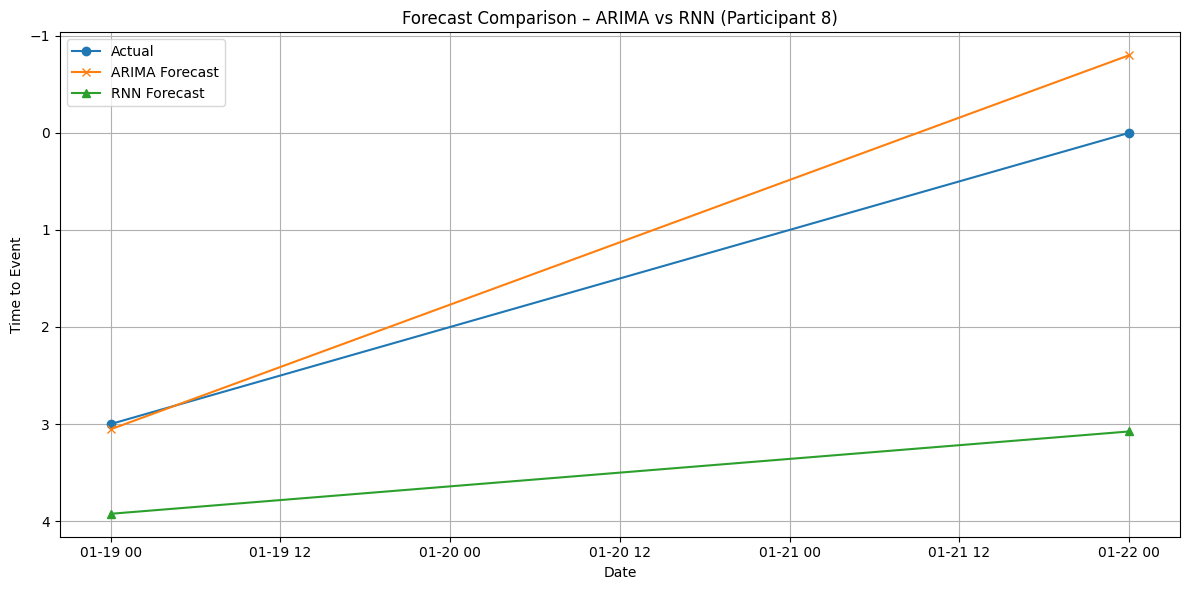

In [58]:
import matplotlib.pyplot as plt

# ÿßÿ∑ŸÖ€åŸÜÿßŸÜ ÿßÿ≤ ÿß€åŸÜ⁄©Ÿá ŸáŸÖŸá ⁄Ü€åÿ≤ ÿØÿ± ŸÇÿßŸÑÿ® ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å ÿ™ŸÜÿ∏€åŸÖ ÿ¥ÿØŸá
# y_test: ŸÖÿ¥ÿßŸáÿØÿßÿ™ ŸàÿßŸÇÿπ€å time_to_event ÿ®ÿ±ÿß€å ÿ™ÿ≥ÿ™
# arima_forecast: Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ARIMA ÿ±Ÿà€å ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ÿ≥ÿ™
# rnn_pred_inv: Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ŸÖÿØŸÑ RNN (ÿØÿ± ŸÖŸÇ€åÿßÿ≥ ÿßÿµŸÑ€å)
# ts: ÿ≥ÿ±€å ÿ≤ŸÖÿßŸÜ€å ÿßÿµŸÑ€å ⁄©ÿßŸÖŸÑ time_to_event

# ÿß€åŸÜÿØ⁄©ÿ≥ ÿØÿßÿØŸá‚ÄåŸáÿß€å ÿ™ÿ≥ÿ™ (ŸáŸÖÿßŸÜ ÿ®ÿßÿ≤Ÿá‚Äåÿß€å ⁄©Ÿá Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ⁄©ÿ±ÿØ€åŸÖ)
plot_index = y_test.index

plt.figure(figsize=(12, 6))

# ÿÆÿ∑ ŸÖÿ¥ÿßŸáÿØÿßÿ™ ŸàÿßŸÇÿπ€å
plt.plot(plot_index, y_test.values, label="Actual", marker='o')

# Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å ARIMA
plt.plot(plot_index, arima_forecast.values, label="ARIMA Forecast", marker='x')

# Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å RNN (ÿ®ÿß ÿß€åŸÜÿØ⁄©ÿ≥ ÿ¨ÿØ€åÿØ ÿ≥ÿßÿÆÿ™Ÿá‚Äåÿ¥ÿØŸá ÿßÿ≤ ŸáŸÖÿßŸÜ ÿ∑ŸàŸÑ)
rnn_plot_index = plot_index[-len(rnn_pred_inv):]  # ÿØÿ± ÿµŸàÿ±ÿ™ ÿßÿÆÿ™ŸÑÿßŸÅ ÿ∑ŸàŸÑ
plt.plot(rnn_plot_index, rnn_pred_inv.flatten(), label="RNN Forecast", marker='^')

plt.title(f"Forecast Comparison ‚Äì ARIMA vs RNN (Participant {sample_pid})")
plt.xlabel("Date")
plt.ylabel("Time to Event")
plt.gca().invert_yaxis()  # ⁄ÜŸàŸÜ ⁄©ÿßŸáÿ¥ ŸÖŸÇÿØÿßÿ± time_to_event €åÿπŸÜ€å ŸÜÿ≤ÿØ€å⁄©‚Äåÿ™ÿ± ÿ¥ÿØŸÜ ÿ®Ÿá event
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Epoch 1/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3s/step - loss: 0.0509
Epoch 2/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 140ms/step - loss: 0.0411
Epoch 3/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 216ms/step - loss: 0.0326
Epoch 4/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 281ms/step - loss: 0.0254
Epoch 5/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 285ms/step - loss: 0.0194
Epoch 6/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 210ms/step - loss: 0.0146
Epoch 7/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 112ms/step - loss: 0.0110
Epoch 8/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 124ms/step - loss: 0.0086
Epoch 9/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 141ms/step - loss: 0.0073
Epoch 10/50
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

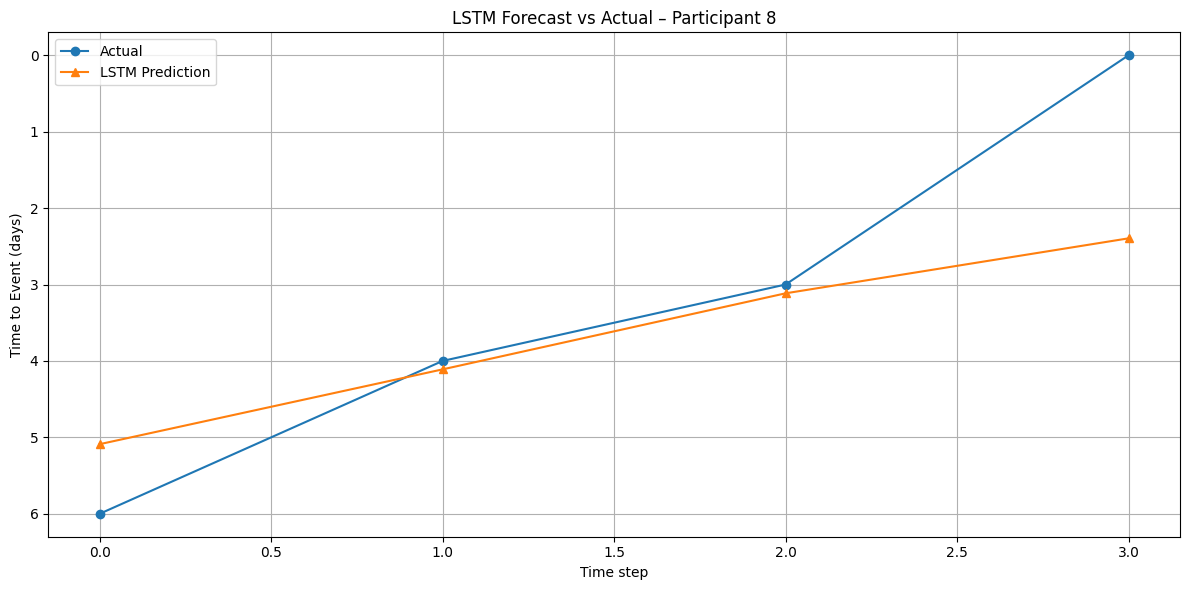

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ÿ™ŸÜÿ∏€åŸÖÿßÿ™
seq_length = 5  # ÿ∑ŸàŸÑ ÿ™ŸàÿßŸÑ€å‚ÄåŸáÿßÿå ÿØÿ± ÿµŸàÿ±ÿ™ ŸÜ€åÿßÿ≤ ŸÇÿßÿ®ŸÑ ÿ™ÿ∫€å€åÿ±
sample_pid = df['participant_id'].unique()[0]

# ŸÅ€åŸÑÿ™ÿ± ⁄©ÿ±ÿØŸÜ ÿØÿßÿØŸá ÿ¥ÿ±⁄©ÿ™‚Äå⁄©ŸÜŸÜÿØŸá
participant_data = df[df['participant_id'] == sample_pid].sort_values('date').set_index('date')
ts = participant_data['time_to_event'].astype(float)

# ŸÜÿ±ŸÖÿßŸÑ‚Äåÿ≥ÿßÿ≤€å
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts.values.reshape(-1, 1))

# ÿ™ÿßÿ®ÿπ ÿ≥ÿßÿÆÿ™ ÿ™ŸàÿßŸÑ€å X Ÿà y
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# ÿ≥ÿßÿÆÿ™ ÿ™ŸàÿßŸÑ€å‚ÄåŸáÿß
X_train, y_train = create_sequences(ts_scaled, seq_length)
X_train = X_train.reshape((X_train.shape[0], seq_length, 1))

# ÿßÿ∑ŸÖ€åŸÜÿßŸÜ ÿßÿ≤ Ÿàÿ¨ŸàÿØ ÿØÿßÿØŸá ⁄©ÿßŸÅ€å
if len(X_train) == 0:
    print("‚ùó ÿØÿßÿØŸá ⁄©ÿßŸÅ€å ÿ®ÿ±ÿß€å ÿ¢ŸÖŸàÿ≤ÿ¥ LSTM Ÿàÿ¨ŸàÿØ ŸÜÿØÿßÿ±ÿØ. seq_length ÿ±ÿß ⁄©ÿßŸáÿ¥ ÿØŸá€åÿØ €åÿß ÿ¥ÿ±⁄©ÿ™‚Äå⁄©ŸÜŸÜÿØŸá‚Äå€å ÿØ€å⁄Øÿ±€å ÿßŸÜÿ™ÿÆÿßÿ® ⁄©ŸÜ€åÿØ.")
else:
    # ÿ™ÿπÿ±€åŸÅ ŸÖÿØŸÑ LSTM
    lstm_model = Sequential([
        LSTM(50, activation='tanh', input_shape=(seq_length, 1)),
        Dense(1)
    ])
    lstm_model.compile(optimizer='adam', loss='mse')
    lstm_model.fit(X_train, y_train, epochs=50, verbose=1)

    # Ÿæ€åÿ¥‚Äåÿ®€åŸÜ€å
    lstm_pred_scaled = lstm_model.predict(X_train)
    lstm_pred = scaler.inverse_transform(lstm_pred_scaled)
    actual_y = scaler.inverse_transform(y_train)

    # ÿ±ÿ≥ŸÖ ŸÜŸÖŸàÿØÿßÿ±
    plt.figure(figsize=(12, 6))
    plt.plot(actual_y, label='Actual', marker='o')
    plt.plot(lstm_pred, label='LSTM Prediction', marker='^')
    plt.title(f'LSTM Forecast vs Actual ‚Äì Participant {sample_pid}')
    plt.xlabel('Time step')
    plt.ylabel('Time to Event (days)')
    plt.gca().invert_yaxis()  # ⁄ÜŸàŸÜ ÿ¥ŸÖÿßÿ±ÿ¥ ŸÖÿπ⁄©Ÿàÿ≥Ÿá
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


ÿ™Ÿàÿ∂€åÿ≠ ŸÖÿØŸÑ ÿßŸÑ ÿßÿ≥ ÿ™€å ÿßŸÖ. €å⁄© ŸÜŸàÿπ ŸÖÿØŸÑ ÿÆÿ∑€å ÿ®ÿß ÿ™ÿßÿ®ÿπ ŸÅÿπÿßŸÑ ÿ≥ÿßÿ≤€å ⁄©Ÿá ŸÖŸÇÿßÿØ€åÿ±ÿ¥ ÿ®€åŸÜ ÿµŸÅÿ± Ÿà €å⁄© Ÿáÿ≥ÿ™ŸÜÿØ Ÿà 50 Ÿàÿßÿ≠ÿØ ÿ≠ÿßŸÅÿ∏Ÿá ÿ®ÿ±ÿß€å €åÿßÿØ⁄Ø€åÿ±€å. Ÿà ÿß€åŸÜ⁄©Ÿá ŸÑÿß€åŸá ÿØŸÜÿ≥ €å⁄© ŸÑÿß€åŸá ÿß€å ÿßÿ≥ÿ™ ⁄© ÿÆÿ±Ÿàÿ¨€å ŸÜŸáÿß€å€å ÿ±Ÿà ÿßÿ≤ ŸÑÿß€åŸá ŸÖÿ™ŸàÿßŸÑ€å ŸÇÿ®ŸÑ€å ŸÖ€å⁄Ø€åÿ±Ÿá Ÿà Ÿæ€åÿ¥ ÿ®€åŸÜ€å ÿ±Ÿà ÿ±Ÿàÿ¥ ÿßŸÜÿ¨ÿßŸÖ ŸÖ€åÿØŸá. ÿπÿØÿØ €å⁄© ⁄©ŸÜÿßÿ± ÿ≥€å⁄©ŸàŸÜÿ¥ÿßŸÑ ÿ®Ÿá ŸÖÿπŸÜ€å ÿß€åŸÜŸá ⁄© ÿ™ŸÜŸáÿß ÿ®Ÿá ÿØÿßÿØŸá Ÿáÿß€å €å⁄© ÿ±Ÿàÿ≤ ŸÇÿ®ŸÑÿ¥ ÿ™Ÿàÿ¨Ÿá ŸÖ€å⁄©ŸÜŸá.

In [72]:
# Predict on test set
lstm_pred_scaled = lstm_model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, lstm_pred_scaled)
mse = mean_squared_error(y_test, lstm_pred_scaled)
rss = np.sum((y_test - lstm_pred_scaled) ** 2)
print("===== LSTM Model (Global) =====")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RSS: {rss:.4f}")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 56ms/step
===== LSTM Model (Global) =====
MAE: 0.1499
MSE: 0.0225
RSS: 0.0225


what is LSTM and RNN and what is the diff between them? LSTM (Long Short-Term Memory) is a special type of Recurrent Neural Network (RNN).

It is specifically designed to work with sequential data, such as time series, natural language, or any data where order and temporal dependencies matter.RNNs can retain memory from previous steps, which makes them useful for predicting the next value in a sequence.
For example:

Blood pressure values over the last 3 days ‚Üí predict today's value but They can't remember information from far back in the sequence, like what happened 20 time steps ago.
This is known as the vanishing gradient problem.LSTM is an improved version of RNN that can remember long-term information.

It does this by using a cell state (a kind of internal memory) and three special gates that control the flow of information.

so when the LSTM i good, generalized it to all participants.

In [73]:
#Prepare global LSTM sequences
seq_length = 5
grouped = df.groupby('participant_id')
all_sequences = []

for pid, group in grouped:
    if len(group) >= seq_length + 1:
        series = group.sort_values('date')['time_to_event'].values
        scaler = MinMaxScaler()
        scaled_series = scaler.fit_transform(series.reshape(-1, 1))
        for i in range(len(scaled_series) - seq_length):
            X_seq = scaled_series[i:i+seq_length]
            y_seq = scaled_series[i+seq_length]
            all_sequences.append((X_seq, y_seq))

X_all = np.array([seq[0] for seq in all_sequences])
y_all = np.array([seq[1] for seq in all_sequences])
X_all = X_all.reshape((X_all.shape[0], seq_length, 1))

#Training our LSTM model
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_all, y_all, epochs=50, verbose=0)
#Prediction
def predict_non_hypertensive_date(df, participant_id, model, seq_length=5):
    df_part = df[df['participant_id'] == participant_id].sort_values('date')
    ts = df_part.set_index('date')['time_to_event'].astype(float)

    if len(ts) <= seq_length + 1:
        return None

    scaler = MinMaxScaler()
    ts_scaled = scaler.fit_transform(ts.values.reshape(-1, 1))

    X_p = np.array([ts_scaled[i:i+seq_length] for i in range(len(ts_scaled) - seq_length)])
    X_p = X_p.reshape((X_p.shape[0], seq_length, 1))

    preds_scaled = model.predict(X_p)
    preds = scaler.inverse_transform(preds_scaled)

    dates = ts.index[seq_length:]
    for date, val in zip(dates, preds.flatten()):
        if val <= 0.5:  # Threshold for predicting recovery
            return date

    return dates[-1]

#to all participant applying
results = []
for pid in df['participant_id'].unique():
    pred_date = predict_non_hypertensive_date(df, pid, model)
    if pred_date is not None:
        results.append({
            'participant_id': pid,
            'predicted_non_hypertensive_date': pred_date
        })

# Create and save our results
forecast_df = pd.DataFrame(results)
forecast_df = forecast_df.sort_values("predicted_non_hypertensive_date")

# View the result
print(forecast_df.head())

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 189ms/step


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 195ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 69ms/step


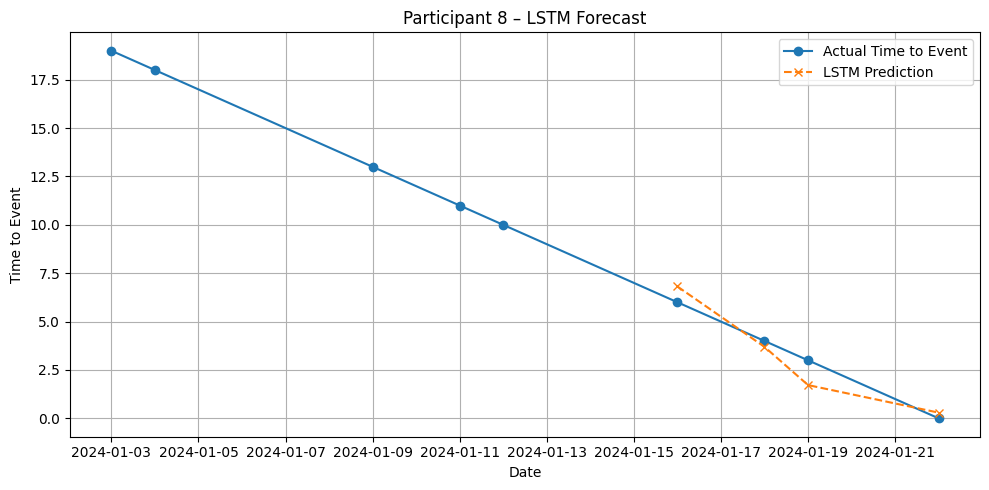

Participant 24 has too few records.
Participant 26 has too few records.
Participant 29 has too few records.
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 61ms/step


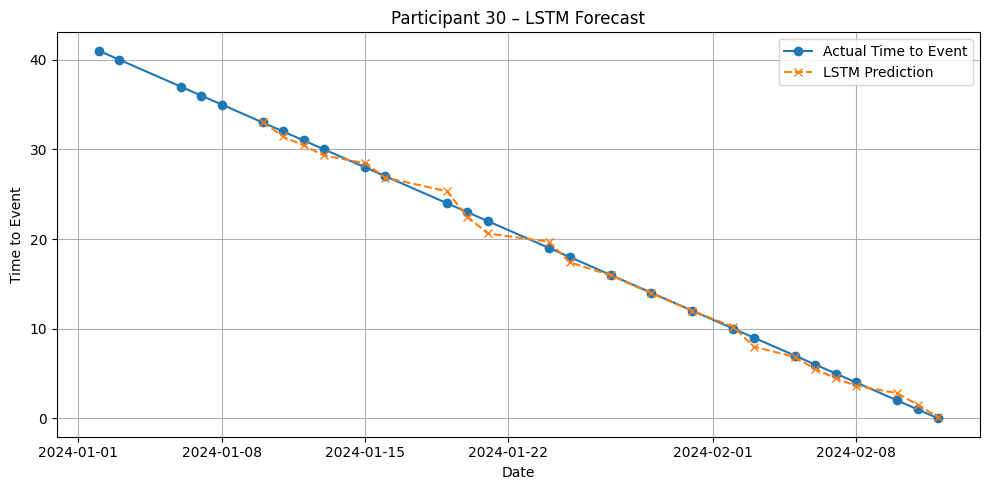

Participant 36 has too few records.
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 57ms/step


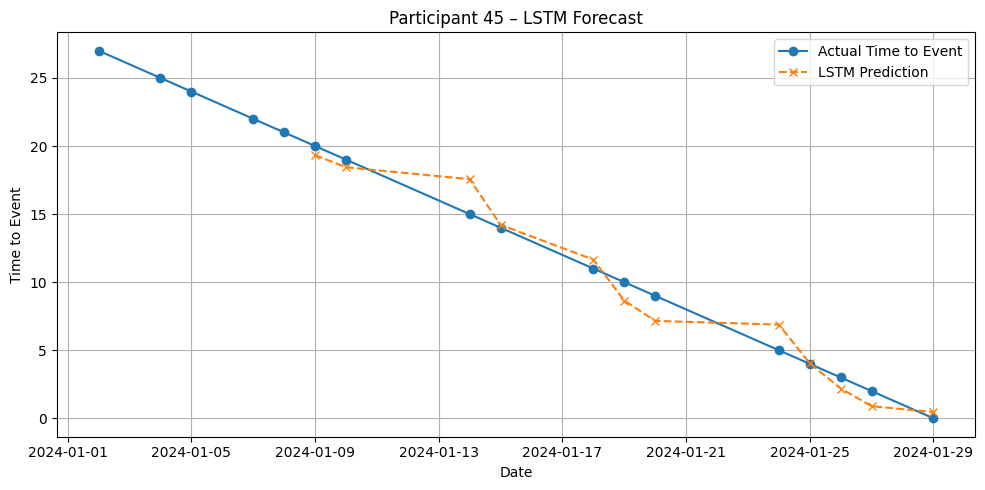

Participant 53 has too few records.
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step


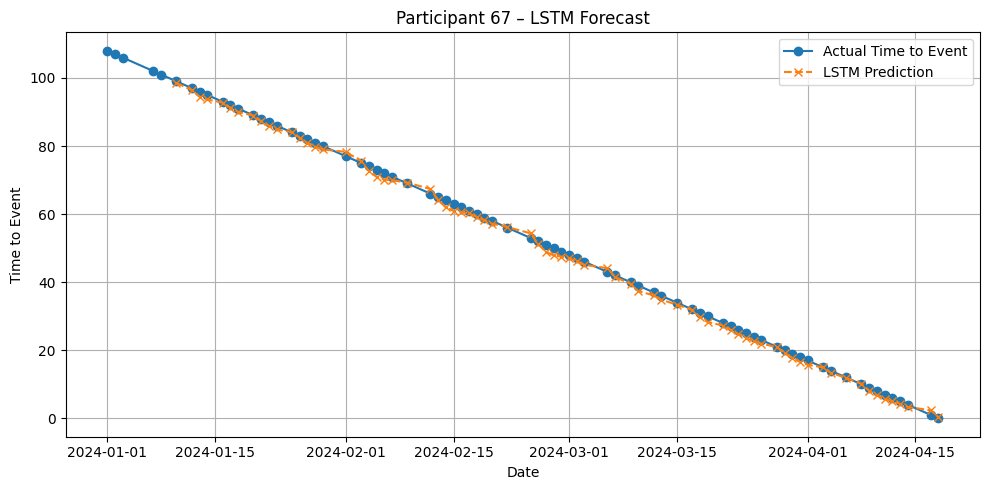

Participant 77 has too few records.
Participant 92 has too few records.
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 240ms/step


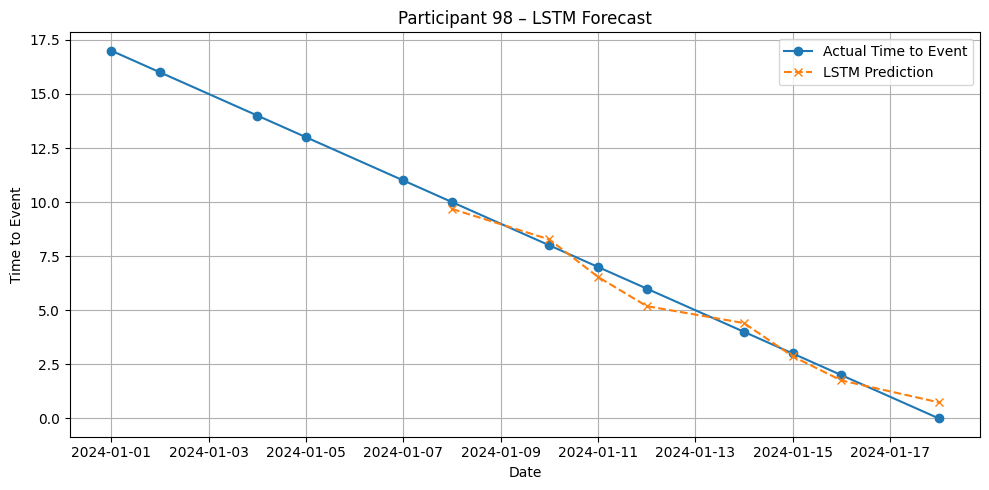

Participant 117 has too few records.
Participant 139 has too few records.
Participant 154 has too few records.
Participant 158 has too few records.
Participant 169 has too few records.
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 142ms/step


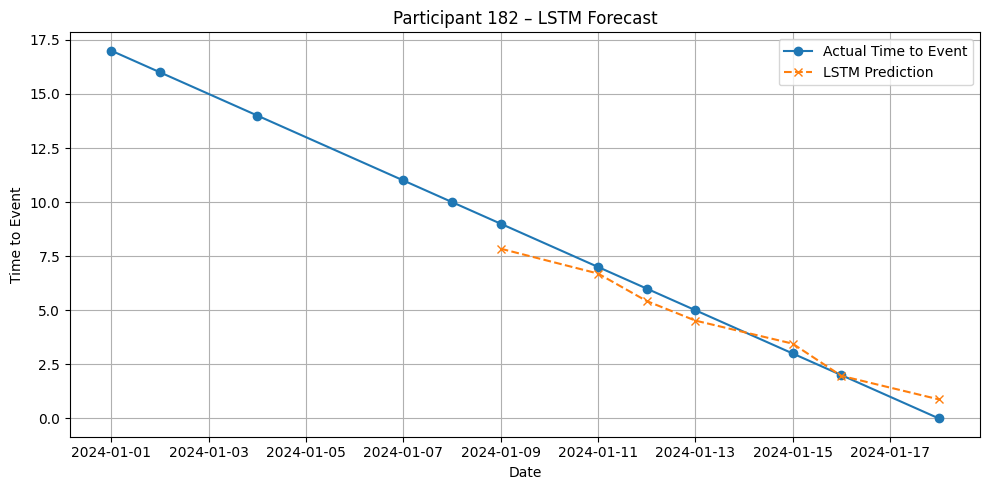

Participant 184 has too few records.
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 229ms/step


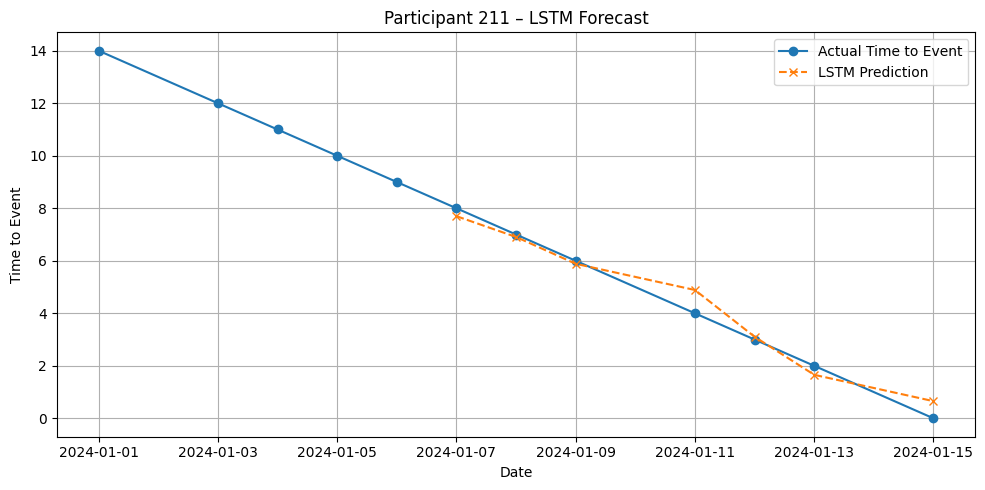

Participant 247 has too few records.
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step


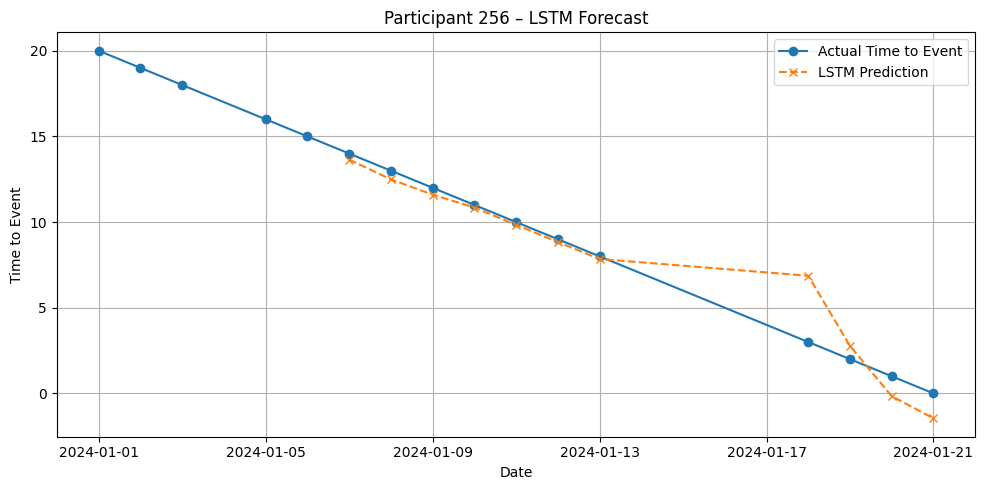

Participant 273 has too few records.
Participant 280 has too few records.
Participant 282 has too few records.
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 12ms/step


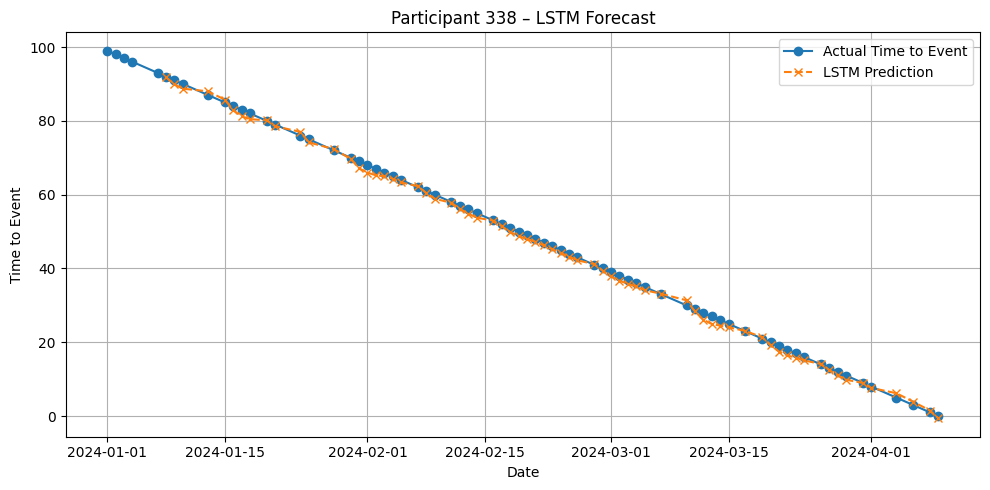

Participant 343 has too few records.
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 50ms/step


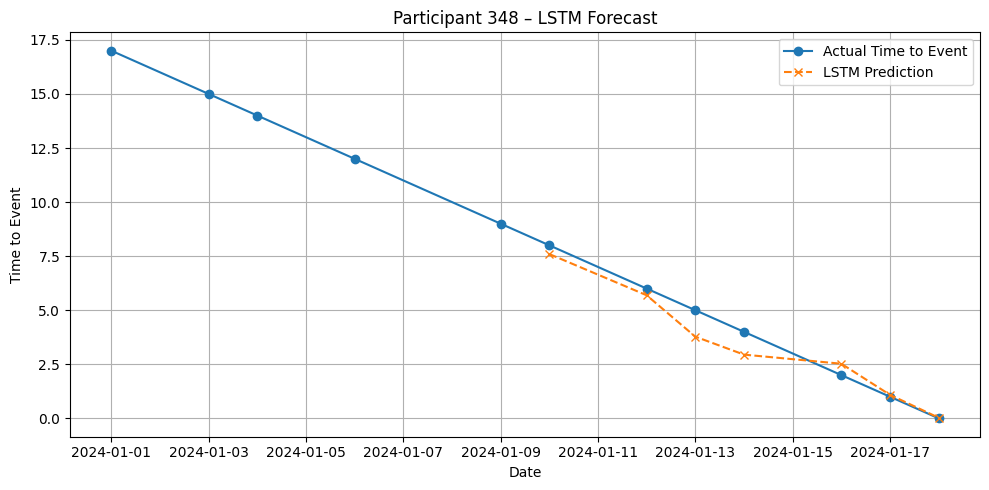

Participant 349 has too few records.
Participant 375 has too few records.


In [74]:
def plot_participant_forecast(df, participant_id, model, seq_length=5):
    df_part = df[df['participant_id'] == participant_id].sort_values('date')
    ts = df_part.set_index('date')['time_to_event'].astype(float)

    if len(ts) <= seq_length + 1:
        print(f"Participant {participant_id} has too few records.")
        return

    scaler = MinMaxScaler()
    ts_scaled = scaler.fit_transform(ts.values.reshape(-1, 1))

    X_p = np.array([ts_scaled[i:i+seq_length] for i in range(len(ts_scaled) - seq_length)])
    X_p = X_p.reshape((X_p.shape[0], seq_length, 1))
    preds_scaled = model.predict(X_p)
    preds = scaler.inverse_transform(preds_scaled)

    dates = ts.index[seq_length:]
    actual = ts[seq_length:]

    plt.figure(figsize=(10, 5))
    plt.plot(ts.index, ts.values, label="Actual Time to Event", marker='o')
    plt.plot(dates, preds.flatten(), label="LSTM Prediction", linestyle='--', marker='x')
    plt.title(f"Participant {participant_id} ‚Äì LSTM Forecast")
    plt.xlabel("Date")
    plt.ylabel("Time to Event")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage:
for pid in df['participant_id'].unique()[:30]:  # first 5 participants if we want to see for more participants we can adjust it
    plot_participant_forecast(df, pid, model)

8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step
7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step
6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step 
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step
5/5 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 22ms/step
4/4 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 34ms/step 


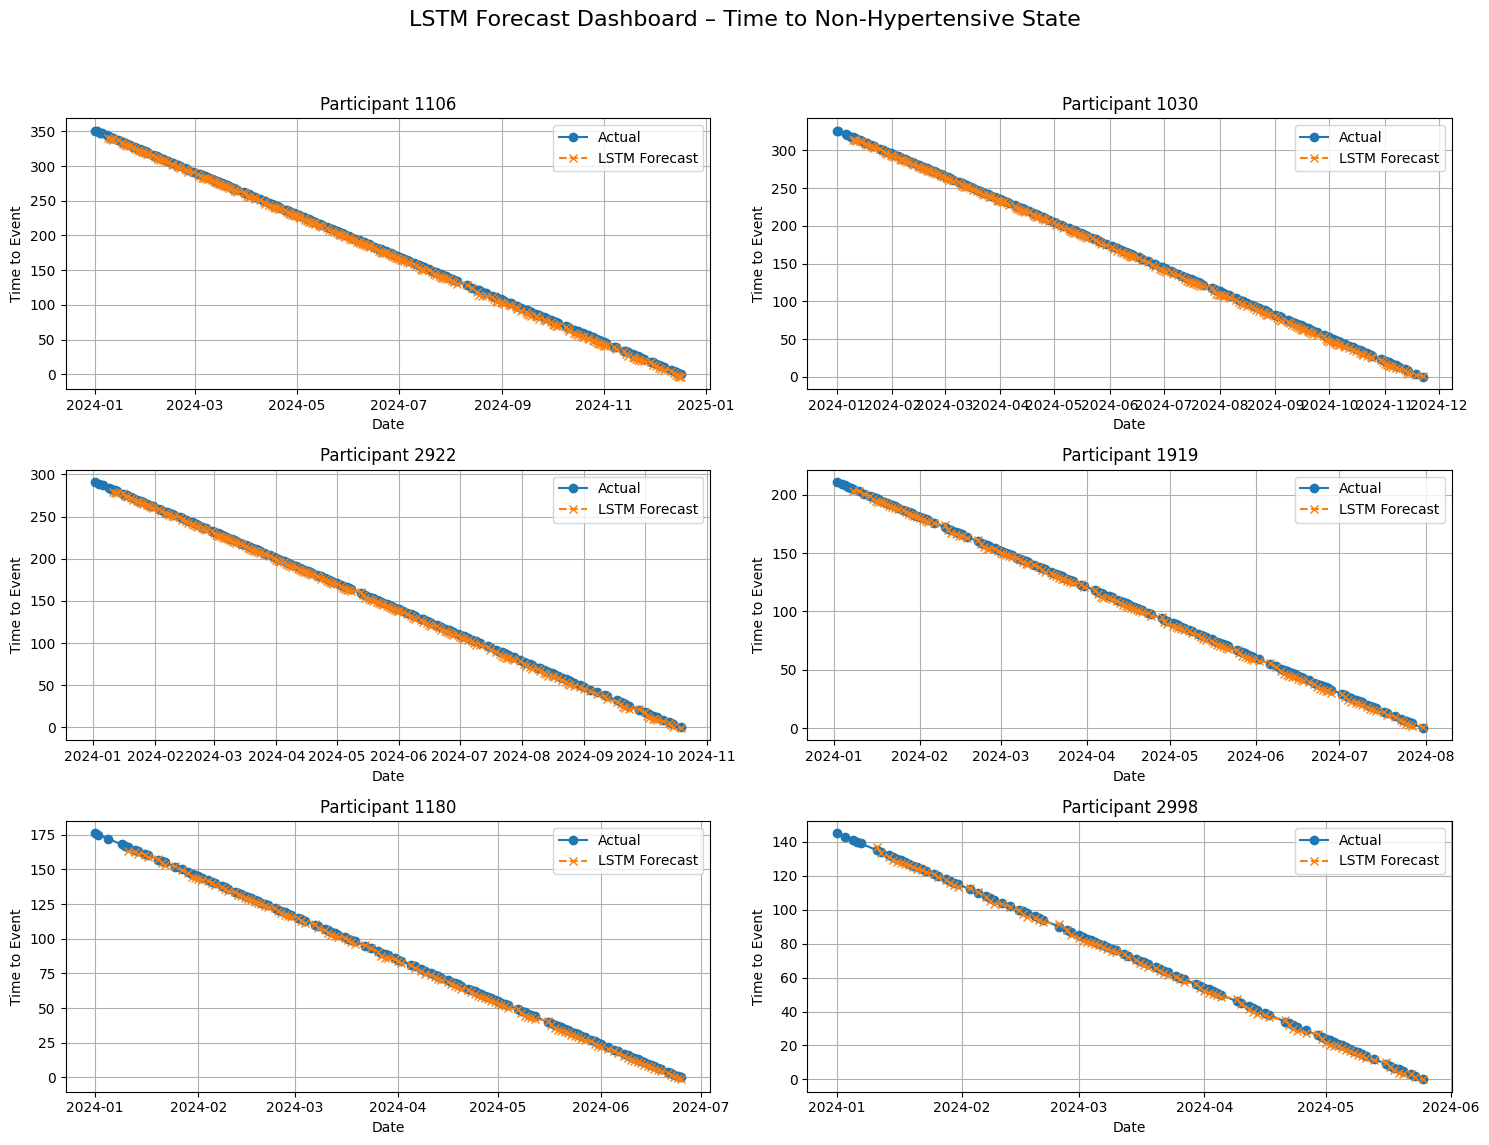

In [76]:
def plot_forecast_for_participant(df, participant_id, model, seq_length=5):
    df_part = df[df['participant_id'] == participant_id].sort_values('date')
    ts = df_part.set_index('date')['time_to_event'].astype(float)

    if len(ts) <= seq_length + 1:
        return

    scaler = MinMaxScaler()
    ts_scaled = scaler.fit_transform(ts.values.reshape(-1, 1))
    X = np.array([ts_scaled[i:i+seq_length] for i in range(len(ts_scaled) - seq_length)])
    X = X.reshape((X.shape[0], seq_length, 1))

    pred_scaled = model.predict(X)
    pred = scaler.inverse_transform(pred_scaled)

    dates = ts.index[seq_length:]

    plt.plot(ts.index, ts.values, label="Actual", marker='o')
    plt.plot(dates, pred.flatten(), label="LSTM Forecast", linestyle='--', marker='x')
    plt.title(f"Participant {participant_id}")
    plt.xlabel("Date")
    plt.ylabel("Time to Event")
    plt.legend()
    plt.grid(True)

# Creating dashboard for 6 participants
sample_participants = df['participant_id'].value_counts().loc[lambda x: x >= 10].index[:6]

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, pid in enumerate(sample_participants):
    plt.sca(axes[idx])
    plot_forecast_for_participant(df, pid, model)

plt.suptitle("LSTM Forecast Dashboard ‚Äì Time to Non-Hypertensive State", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()